# Assignment: Advanced Regression
Build a regularized regression model to understand the most important variables to predict the house prices in Australia.

## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market.  The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
The company is looking at prospective properties to buy to enter the market and wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal
Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market..

##  Import Libraries

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 100)

## Reading and Understanding the Data

In [2]:
#Reading the day csv file
inp0 = pd.read_csv("train.csv")
inp0.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

#### Routine structure check / Inspecting the Dataframe

In [315]:
# Checking the number of rows and columns in the dataframe
inp0.shape

(1460, 81)

In [316]:
# Check the column-wise info of the dataframe
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [317]:
# Create a dummy dataframe (copy of original inp0) for duplicate check
inp0_dup = inp0

# Checking for duplicates and dropping the entire duplicate row if any
inp0_dup.drop_duplicates(subset=None, inplace=True)

inp0_dup.shape

(1460, 81)

#### Insights: -
The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were NO DUPLICATE values in the dataset



In [318]:
# Check the summary for the numeric columns
inp0.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Understanding data
- The given dataset has 1460rows and 81 columns.
- Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. 
- Also, there are a lot of null values present as well, so we will need to treat them accordingly.
- Dependent Variable : SalePrice
- The rest all are independent variables.
- Note the scale of our dependent valriable SalePrice is very different with the independent variable. So its required to do the  scaling the dependent variable. 


## Data Cleaning , Sanity Check and Preparation

#### We can see there are 4 Year columns. 
- We can convert this with the age or how old to make it meaningful. 
- We can fill these columns with number ,by calculating the age by subtracting the year given in the column from the current year. 
- Only year_built is significant  and so we can convert year_built to age column and drop the rest insignificant year columns.

In [319]:
todays_date = date.today()
inp0['YearBuilt_Age'] = todays_date.year-inp0.YearBuilt
inp0[['YearBuilt','YearBuilt_Age']].sample(10)

,YearBuilt,YearBuilt_Age
1109,2004,17
314,1925,96
626,1960,61
797,1953,68
252,2004,17
1443,1916,105
299,1950,71
1092,1925,96
699,2004,17
298,1968,53


In [320]:
# Lets drop the actual Year columns and keep the derived age column
inp0 = inp0.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Checking the dataset for the amount of nulls present¶

In [321]:
# percentage of missing values in each column
round(100*(inp0.isnull().sum()/len(inp0.index)), 2).sort_values(ascending=False)


PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
CentralAir      0.00
SalePrice       0.00
Heating         0.00
TotalBsmtSF     0.00
Id              0.00
Length: 78, dtype: float64

#### Insights:
As we can see there are a lot of column which have high number of missing values. We will drop the columns having more than 40% NA values, because it is not a great move if we are imputing more than approx. 40% of data based on predictions and assumptions. Then rest columns ( less than 40% missing values) we will check one by one to decide to drop or impute.

#### Drop columns that have null values > 40%

In [322]:
# List of Columns & NA counts where NA values are more than 40%
NA_col = inp0.isnull().sum().sort_values(ascending = False)
NA_col = NA_col[NA_col.values >(0.40*len(inp0))]

In [323]:
# Number of columns having percentage of null values > 40%
len(NA_col)

5

In [324]:
#dropping the above columns from dataframe for further analysis
inp0_df = inp0.drop(columns=NA_col.index)

In [325]:
inp0_df.shape

(1460, 73)

In [326]:
# Let see after drop of 5 columns what are left and how can we treat those.
# percentage of missing values in each column
round(100*(inp0_df.isnull().sum()/len(inp0_df.index)), 2).sort_values(ascending=False)

LotFrontage     17.74
GarageType       5.55
GarageFinish     5.55
GarageCond       5.55
GarageQual       5.55
                ...  
1stFlrSF         0.00
CentralAir       0.00
HeatingQC        0.00
SalePrice        0.00
Id               0.00
Length: 73, dtype: float64

In [327]:
NA_col1 = inp0_df.isnull().sum().sort_values(ascending = False)
NA_col1 = NA_col1[NA_col1.values >(0.000001*len(inp0))]
NA_col1

LotFrontage     259
GarageType       81
GarageFinish     81
GarageCond       81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

#### Insights:
There are 13 columns that still have null values. We will look at them individually to see what can be done.

#### Categorical columns or columns of dtype object are imputed with the most frequent value in column. Columns of other types are imputed with mean/median of column.

##### Column: 'LotFrontage'    -  Linear feet of street connected to property
Is a numeric column, so lets impute it with the median value.

In [328]:
# LotFrontage 
inp0_df['LotFrontage'].value_counts(normalize = True, dropna = False) * 100

NaN      17.739726
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
           ...    
106.0     0.068493
38.0      0.068493
138.0     0.068493
140.0     0.068493
137.0     0.068493
Name: LotFrontage, Length: 111, dtype: float64

In [329]:
inp0_df['LotFrontage'].median()

69.0

In [330]:
inp0_df['LotFrontage'] = inp0_df['LotFrontage'].fillna(inp0_df['LotFrontage'].median())
inp0_df['LotFrontage'].isnull().value_counts()

False    1460
Name: LotFrontage, dtype: int64

##### Column: MasVnrArea
Is a numeric column, so lets impute it with the median value.

In [331]:
# MasVnrArea 
inp0_df['MasVnrArea'].value_counts(normalize = True, dropna = False) * 100

0.0      58.972603
72.0      0.547945
180.0     0.547945
NaN       0.547945
108.0     0.547945
           ...    
337.0     0.068493
415.0     0.068493
293.0     0.068493
259.0     0.068493
621.0     0.068493
Name: MasVnrArea, Length: 328, dtype: float64

In [332]:
inp0_df['MasVnrArea'].median()

0.0

In [333]:
inp0_df['MasVnrArea'] = inp0_df['MasVnrArea'].fillna(inp0_df['MasVnrArea'].median())
inp0_df['MasVnrArea'].isnull().value_counts()

False    1460
Name: MasVnrArea, dtype: int64

##### Column: 'GarageFinish'  

In [334]:
# GarageFinish
inp0_df['GarageFinish'].value_counts(normalize = True, dropna = False) * 100

Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64

In [335]:
inp0_df.GarageFinish.fillna('Unf',inplace=True)
inp0_df.GarageFinish.isnull().value_counts()

False    1460
Name: GarageFinish, dtype: int64

##### Column: 'GarageType' 

In [336]:
# GarageType
inp0_df['GarageType'].value_counts(normalize = True, dropna = False) * 100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NaN         5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [337]:
inp0_df.GarageType.fillna('Attchd',inplace=True)
inp0_df.GarageType.isnull().value_counts()

False    1460
Name: GarageType, dtype: int64

##### Column: 'GarageCond' 

In [338]:
# GarageCond
inp0_df['GarageCond'].value_counts(normalize = True, dropna = False) * 100

TA     90.821918
NaN     5.547945
Fa      2.397260
Gd      0.616438
Po      0.479452
Ex      0.136986
Name: GarageCond, dtype: float64

In [339]:
inp0_df.GarageCond.fillna('TA',inplace=True)
inp0_df.GarageCond.isnull().value_counts()

False    1460
Name: GarageCond, dtype: int64

##### Column: 'GarageQual' 

In [340]:
# GarageQual
inp0_df['GarageQual'].value_counts(normalize = True, dropna = False) * 100

TA     89.794521
NaN     5.547945
Fa      3.287671
Gd      0.958904
Po      0.205479
Ex      0.205479
Name: GarageQual, dtype: float64

In [341]:
inp0_df.GarageQual.fillna('TA',inplace=True)
inp0_df.GarageQual.isnull().value_counts()

False    1460
Name: GarageQual, dtype: int64

##### Column: 'BsmtExposure' 

In [342]:
# BsmtExposure
inp0_df['BsmtExposure'].value_counts(normalize = True, dropna = False) * 100

No     65.273973
Av     15.136986
Gd      9.178082
Mn      7.808219
NaN     2.602740
Name: BsmtExposure, dtype: float64

In [343]:
inp0_df.BsmtExposure.fillna('No',inplace=True)
inp0_df.BsmtExposure.isnull().value_counts()

False    1460
Name: BsmtExposure, dtype: int64

##### Column: 'BsmtFinType2' 

In [344]:
# BsmtFinType2
inp0_df['BsmtFinType2'].value_counts(normalize = True, dropna = False) * 100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
NaN     2.602740
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [345]:
inp0_df.BsmtFinType2.fillna('Unf',inplace=True)
inp0_df.BsmtFinType2.isnull().value_counts()

False    1460
Name: BsmtFinType2, dtype: int64

##### Column: 'BsmtFinType1' 

In [346]:
# BsmtFinType1
inp0_df['BsmtFinType1'].value_counts(normalize = True, dropna = False) * 100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
NaN     2.534247
Name: BsmtFinType1, dtype: float64

In [347]:
inp0_df.BsmtFinType1.fillna('Unf',inplace=True)
inp0_df.BsmtFinType1.isnull().value_counts()

False    1460
Name: BsmtFinType1, dtype: int64

##### Column: 'BsmtCond' 

In [348]:
# BsmtCond
inp0_df['BsmtCond'].value_counts(normalize = True, dropna = False) * 100

TA     89.794521
Gd      4.452055
Fa      3.082192
NaN     2.534247
Po      0.136986
Name: BsmtCond, dtype: float64

In [349]:
inp0_df.BsmtCond.fillna('TA',inplace=True)
inp0_df.BsmtCond.isnull().value_counts()

False    1460
Name: BsmtCond, dtype: int64

##### Column: 'BsmtQual' 

In [350]:
# BsmtQual
inp0_df['BsmtQual'].value_counts(normalize = True, dropna = False) * 100

TA     44.452055
Gd     42.328767
Ex      8.287671
NaN     2.534247
Fa      2.397260
Name: BsmtQual, dtype: float64

In [351]:
inp0_df.BsmtQual.fillna('TA',inplace=True)
inp0_df.BsmtQual.isnull().value_counts()

False    1460
Name: BsmtQual, dtype: int64

##### Column: 'MasVnrType' 

In [352]:
# MasVnrType
inp0_df['MasVnrType'].value_counts(normalize = True, dropna = False) * 100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
NaN         0.547945
Name: MasVnrType, dtype: float64

In [353]:
inp0_df.MasVnrType.fillna('None',inplace=True)
inp0_df.MasVnrType.isnull().value_counts()

False    1460
Name: MasVnrType, dtype: int64

##### Column: 'Electrical' 

In [354]:
# Electrical
inp0_df['Electrical'].value_counts(normalize = True, dropna = False) * 100

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
NaN       0.068493
Name: Electrical, dtype: float64

In [355]:
inp0_df.Electrical.fillna('SBrkr',inplace=True)
inp0_df.Electrical.isnull().value_counts()

False    1460
Name: Electrical, dtype: int64

#### Dropping Id, since it isn’t of any significance

In [356]:
inp0_df.drop(['Id'], axis=1, inplace=True)
inp0_df.shape

(1460, 72)

In [357]:
inp0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

## EDA (Exploratory Data Analysis)
-  ### Visualising Numeric Variables

#### SalePrice  : Target/ Dependent  Variable

<Figure size 1152x432 with 0 Axes>

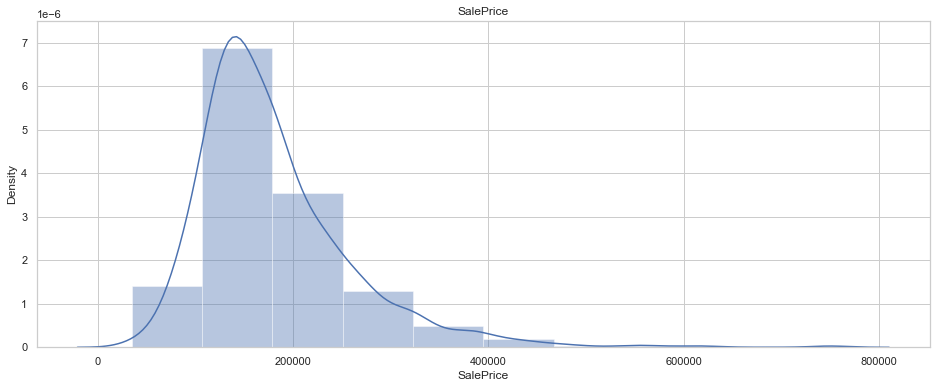

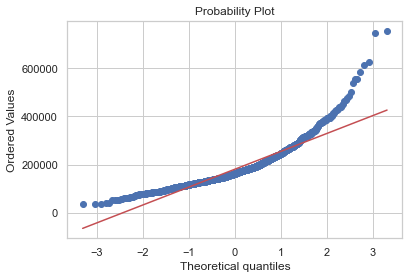

In [358]:
#Plot the distribution
plt.figure(figsize=(16,6))
plt.figure(figsize=(16,6))
plt.title('SalePrice')
sns.distplot(inp0_df['SalePrice'],color="b", bins=10)
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(inp0_df['SalePrice'], plot=plt)
plt.show()


#### Looking at the graph of SalePrice we can say the graph is  skewed.

In [359]:
inp0_df.SalePrice.skew()

1.8828757597682129

#### Lets transform SalePrice to a more normalized distribution.

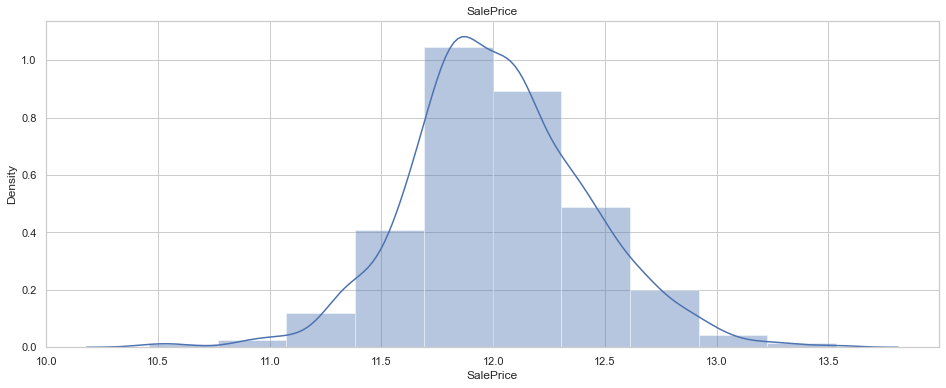

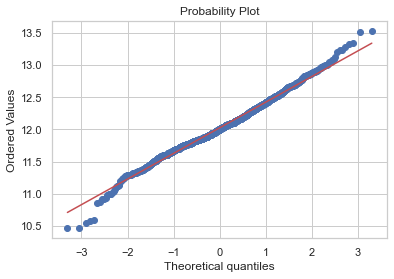

In [360]:
# To Visualise the target variable SalePrice after transforming the Saleprice
#Plot the distribution
inp0_df['SalePrice'] = np.log1p(inp0_df['SalePrice'])

plt.figure(figsize=(16,6))
plt.title('SalePrice')
sns.distplot(inp0_df['SalePrice'],color="b", bins=10)
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(inp0_df['SalePrice'], plot=plt)
plt.show()

In [361]:
inp0_df.SalePrice.skew()

0.12134661989685333

#### Insights:
The skewness has been reduced to approx 0.1 and the target value seems to be normalized with some noise.

In [362]:
# Separate the  numeric columns and categorical columns and also the target column.
# NUMERICAL COLUMNS: 
num_col = list(inp0_df.dtypes[inp0_df.dtypes !='object'].index)
num_col.remove('SalePrice') 

# CATEGORICAL COLUMNS: 
cat_col = list(inp0_df.dtypes[inp0_df.dtypes =='object'].index)


# target COLUMN:
tar_col = 'SalePrice'

In [363]:
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YearBuilt_Age']

In [364]:
# Function for Analysis of Numerical column using scatter plot.
def num_col_plot1(n, col_n,col_t):
    plt.figure(n)
    sns.jointplot(x=col_n, y=col_t, data=inp0_df[[col_n,col_t]])

In [365]:
# Function for Analysis of Numerical column using box plot.
def num_col_plot2(n, col_n):
    plt.figure(n)
    sns.boxplot(inp0_df[col_n])

<Figure size 432x288 with 0 Axes>

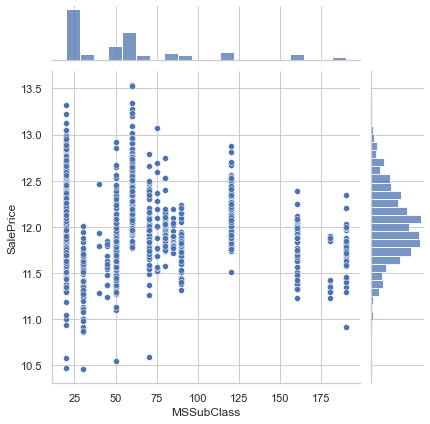

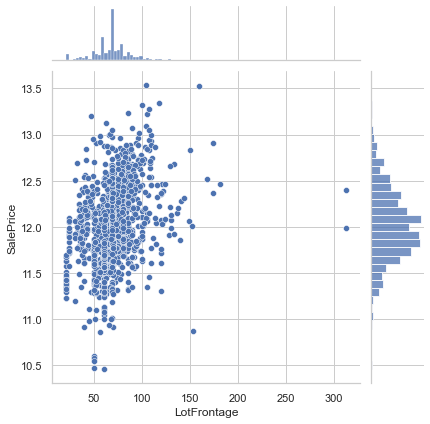

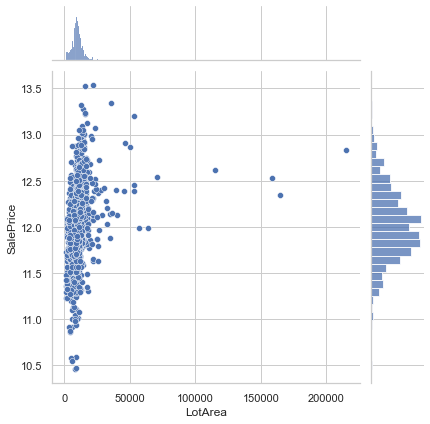

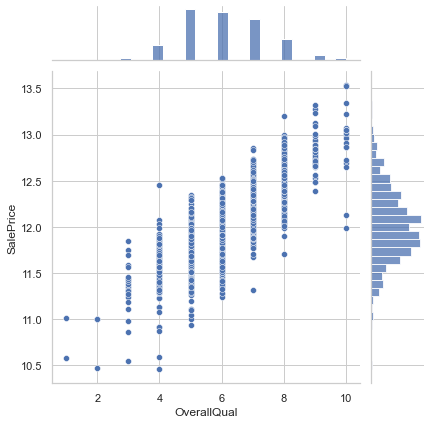

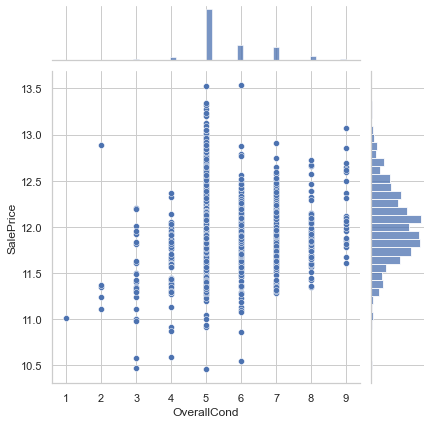

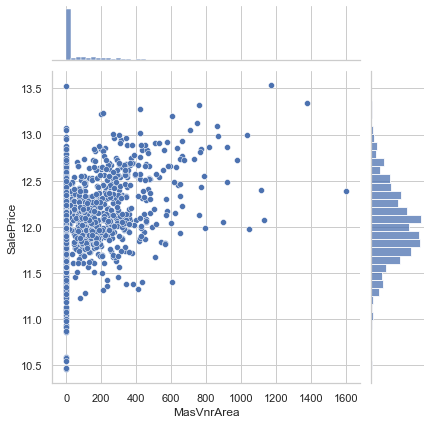

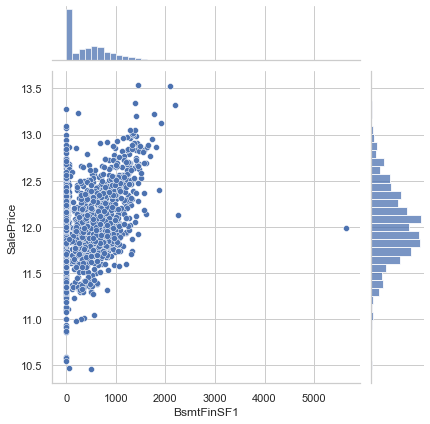

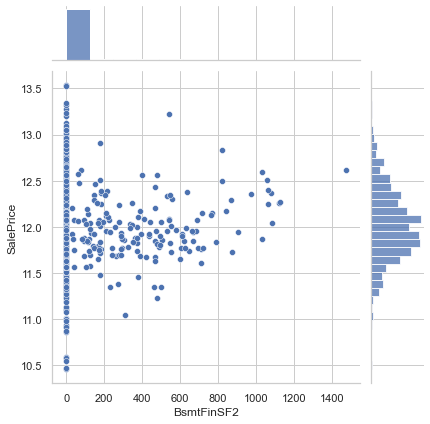

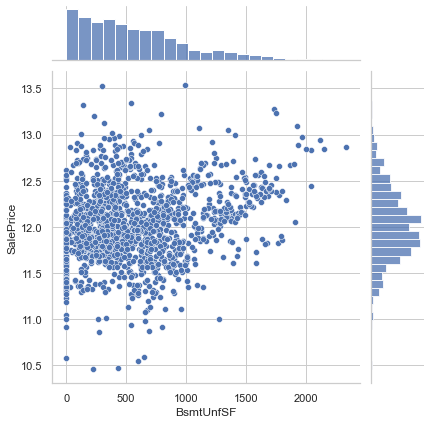

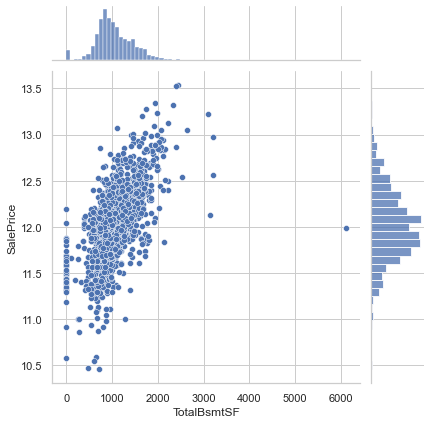

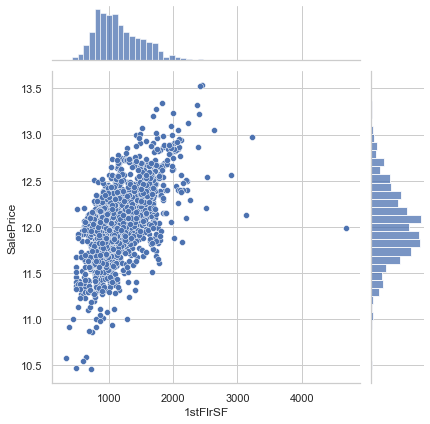

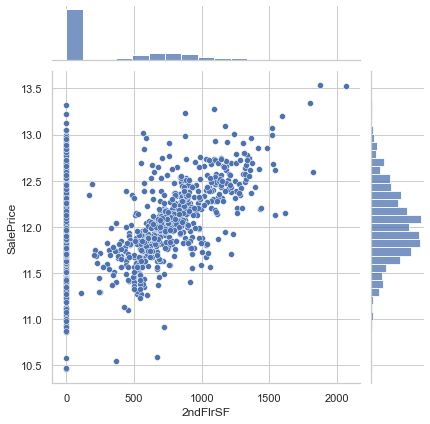

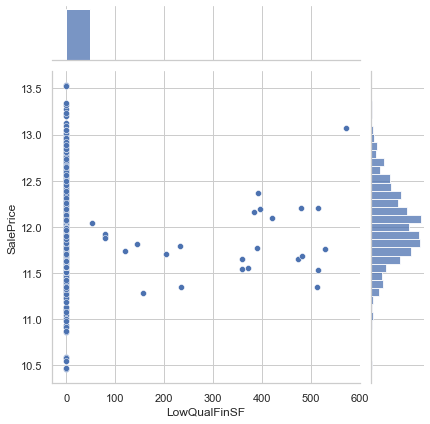

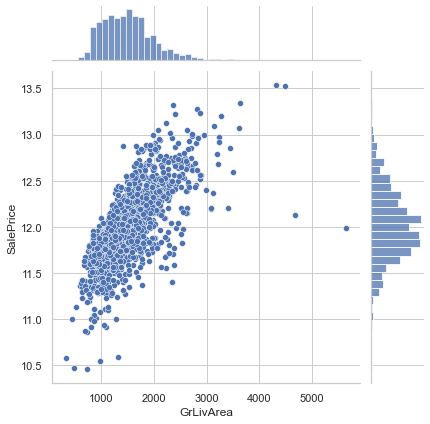

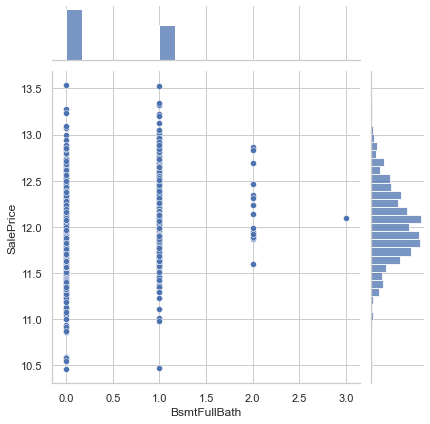

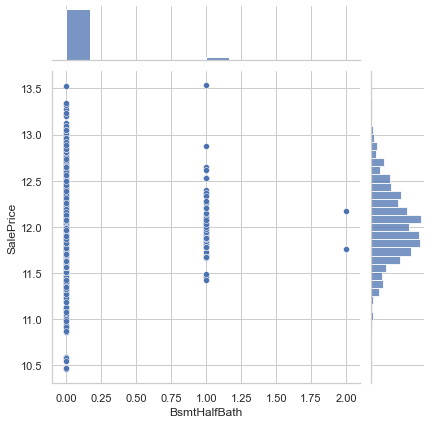

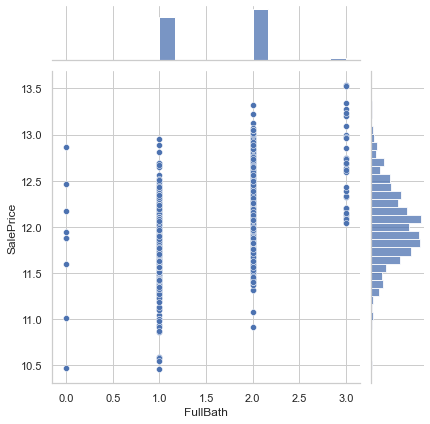

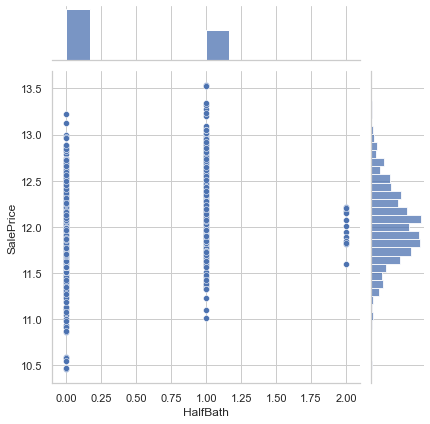

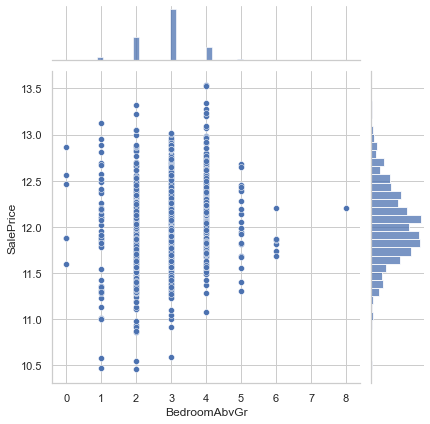

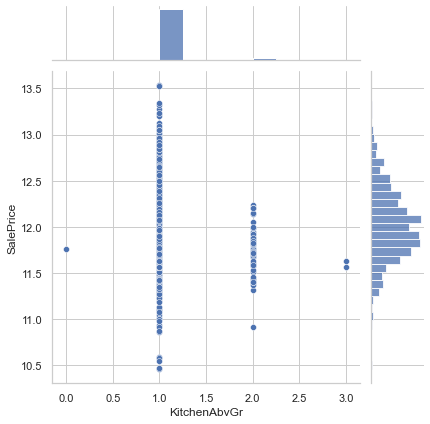

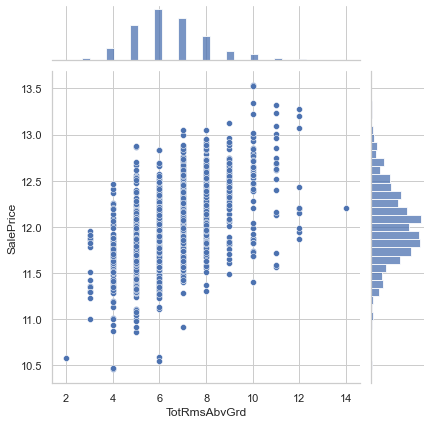

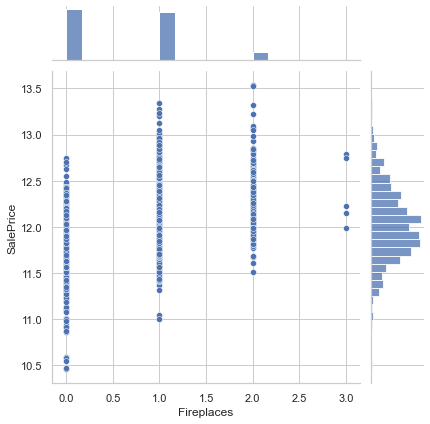

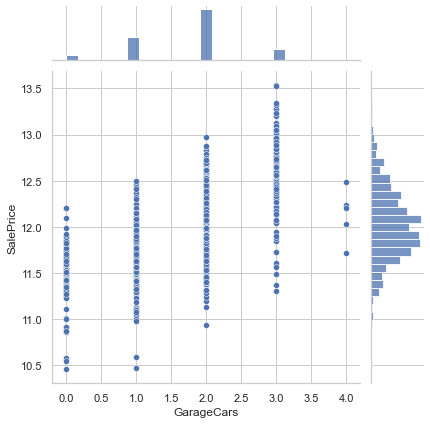

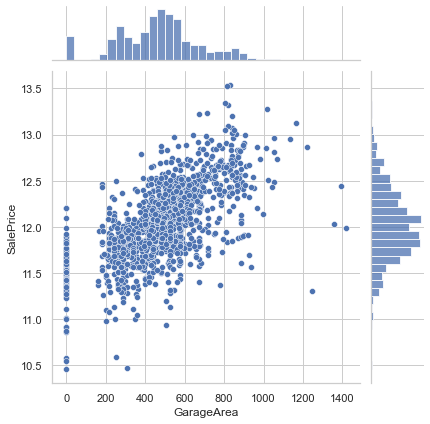

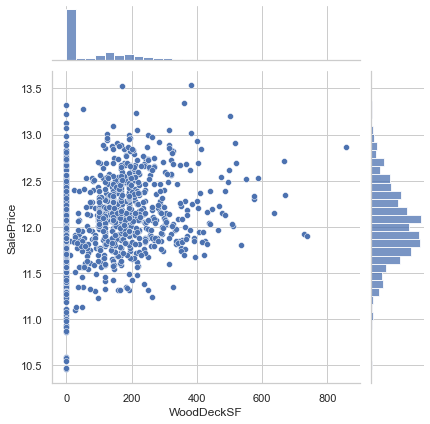

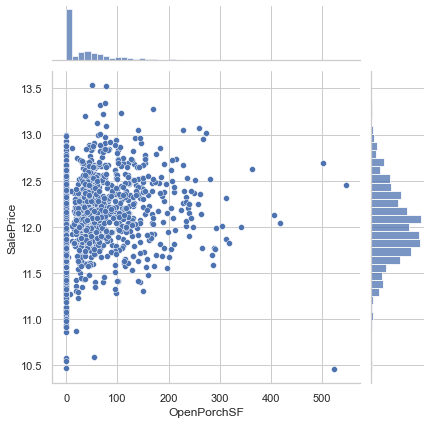

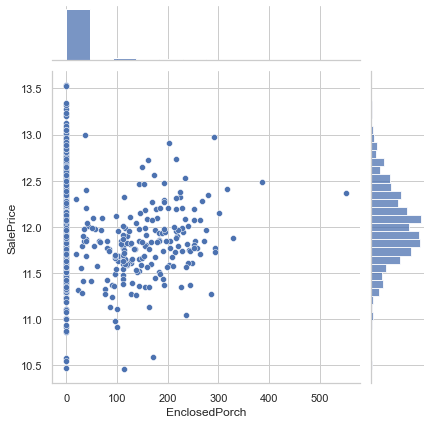

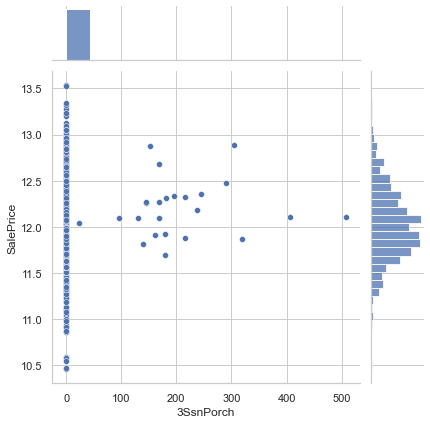

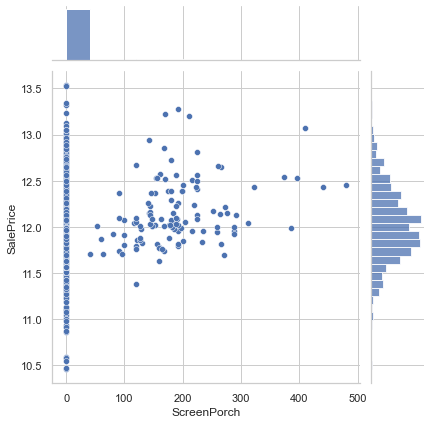

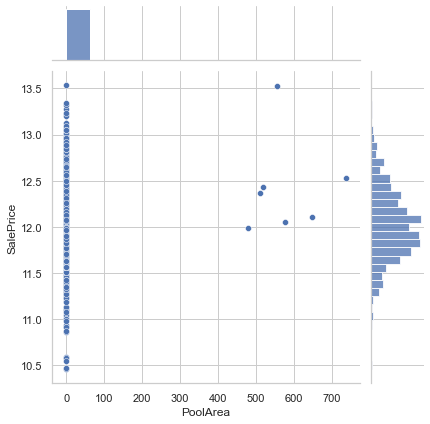

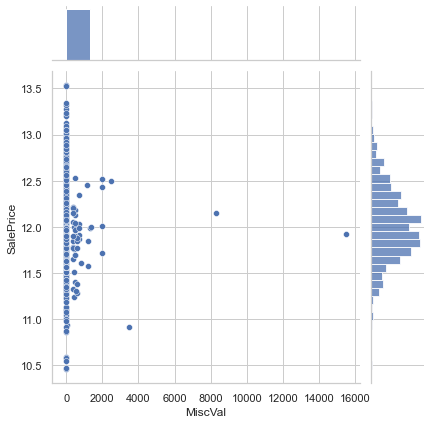

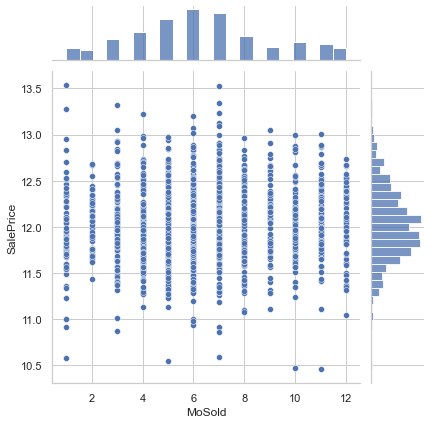

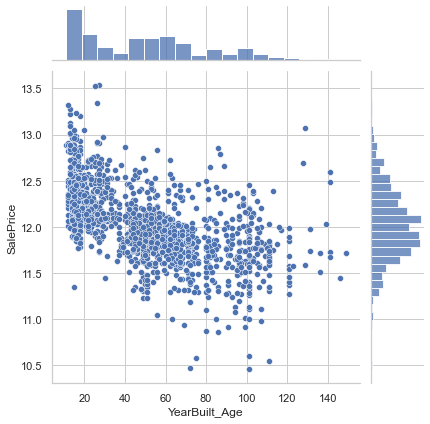

In [366]:
# ANALYSIS1 for numeric columns using scatter plot
for n, col in enumerate(num_col):
    num_col_plot1(n, col, tar_col)

In [367]:
inp0_df.skew()

MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
SalePrice         0.121347
YearBuilt_Age     0.613461
dtype: float64

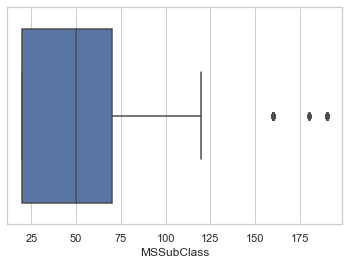

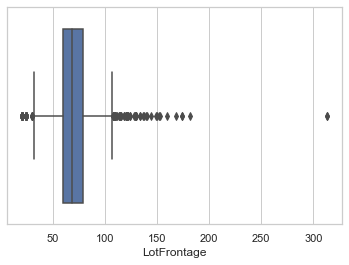

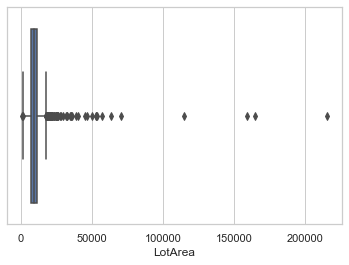

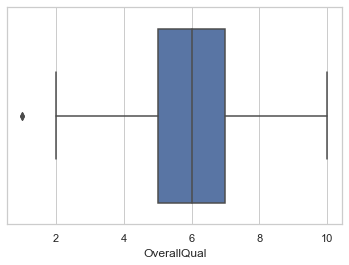

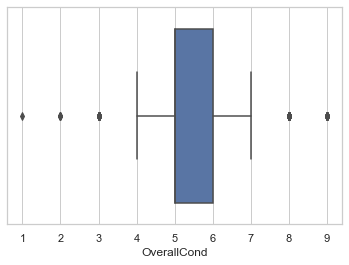

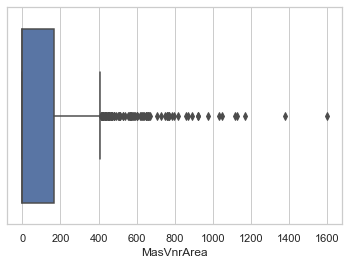

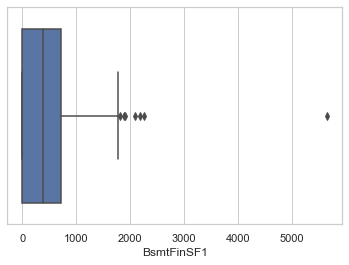

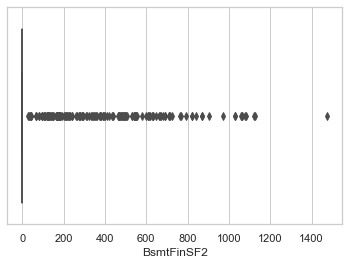

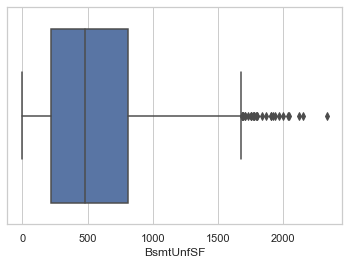

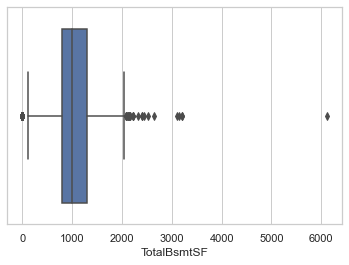

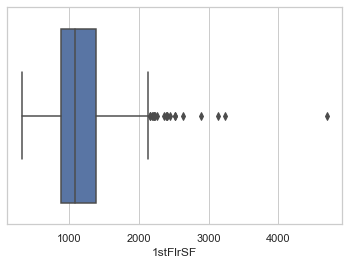

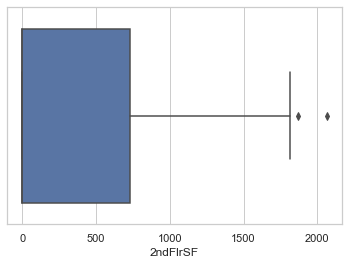

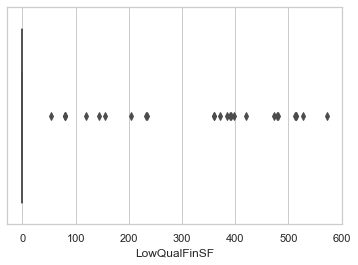

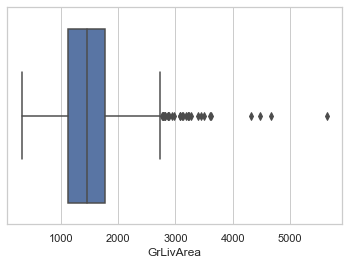

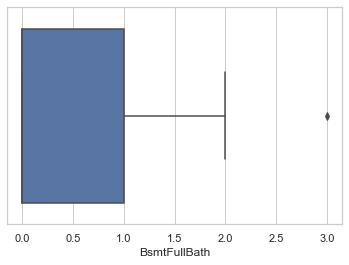

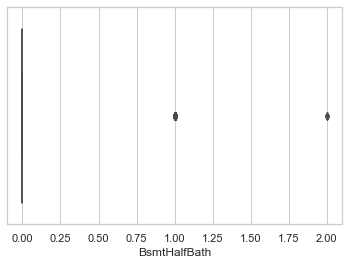

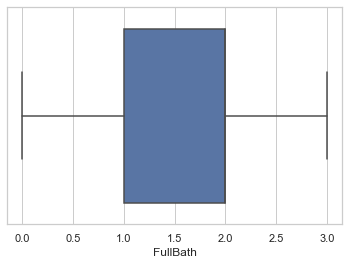

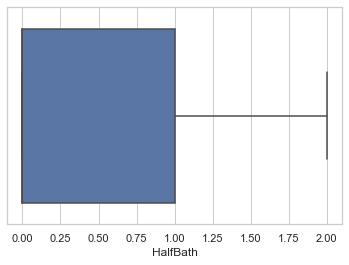

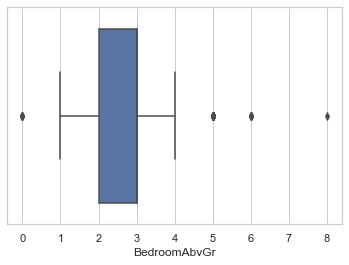

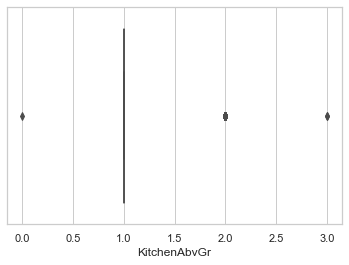

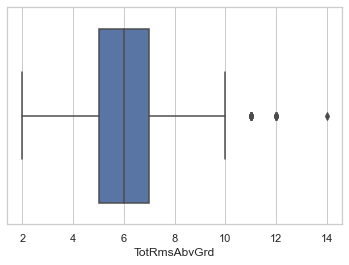

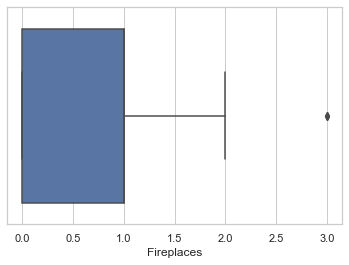

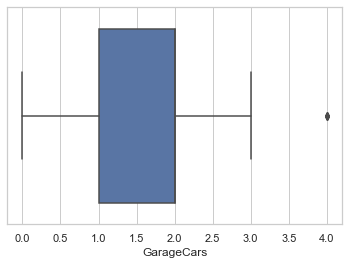

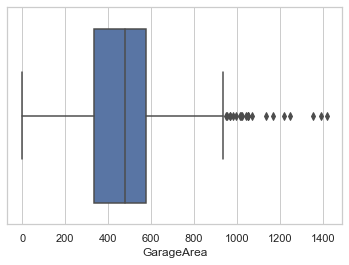

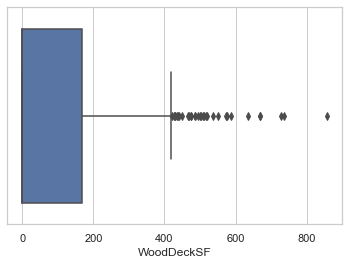

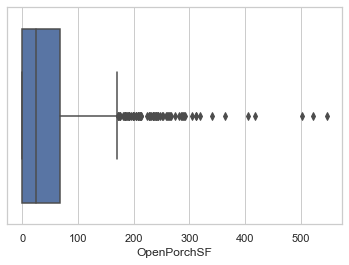

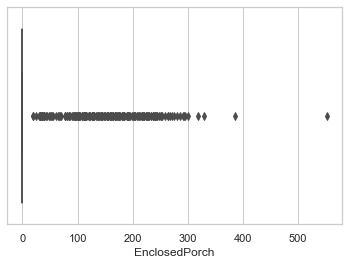

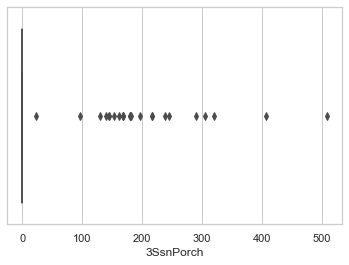

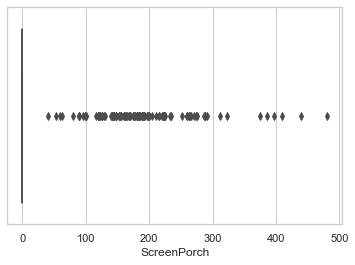

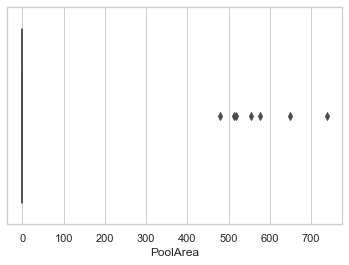

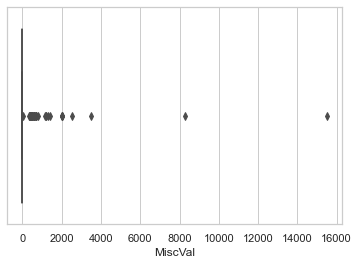

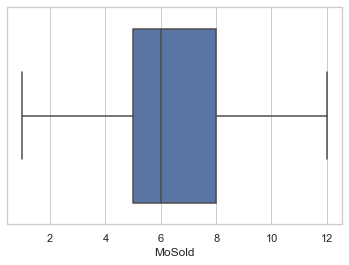

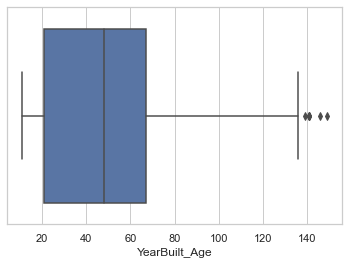

In [368]:
# ANALYSIS2 for numeric columns using box plot
for n, col in enumerate(num_col):
    num_col_plot2(n, col)

#### Insights: 
- There are 33 numerical features left and visualized.
- Most of the variables that deal with the actual physical space of the apartment are postively skewed.


#### Checking for outliers
Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [369]:
# Lets check the shape of the dataframe

inp0_df.shape

(1460, 72)

In [370]:
           
          
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

inp0_df = drop_outliers(inp0_df)



In [371]:
inp0_df.shape

(1439, 72)

### Visualising Categorical Variables

In [372]:
# Function for Analysis of Categorical column using box plot
def cat_col_plot1(c, col_c,col_t):
    plt.figure(c)
    variables = inp0_df[[col_c]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = inp0_df[[col_c,col_t]].groupby(by=[col_c])[col_t].median().sort_values(ascending=True)
    sns.boxplot(x=col_c, y=col_t, data=inp0_df[[col_c,col_t]], order=my_order.index)

In [373]:
# Function for Analysis of Categorical column using count plot
def cat_col_plot2(c, col_c):
    plt.figure(c)
    sns.countplot(x=col_c,data=inp0_df)

<Figure size 432x288 with 0 Axes>

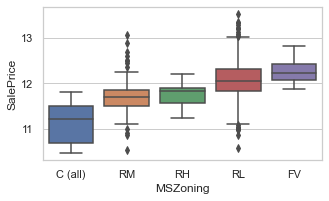

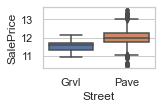

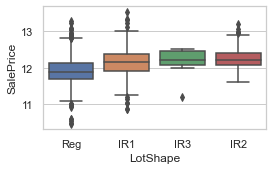

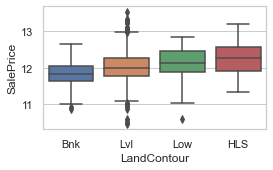

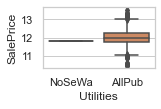

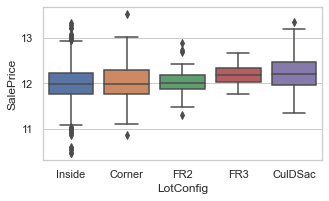

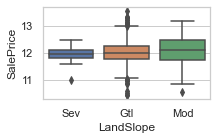

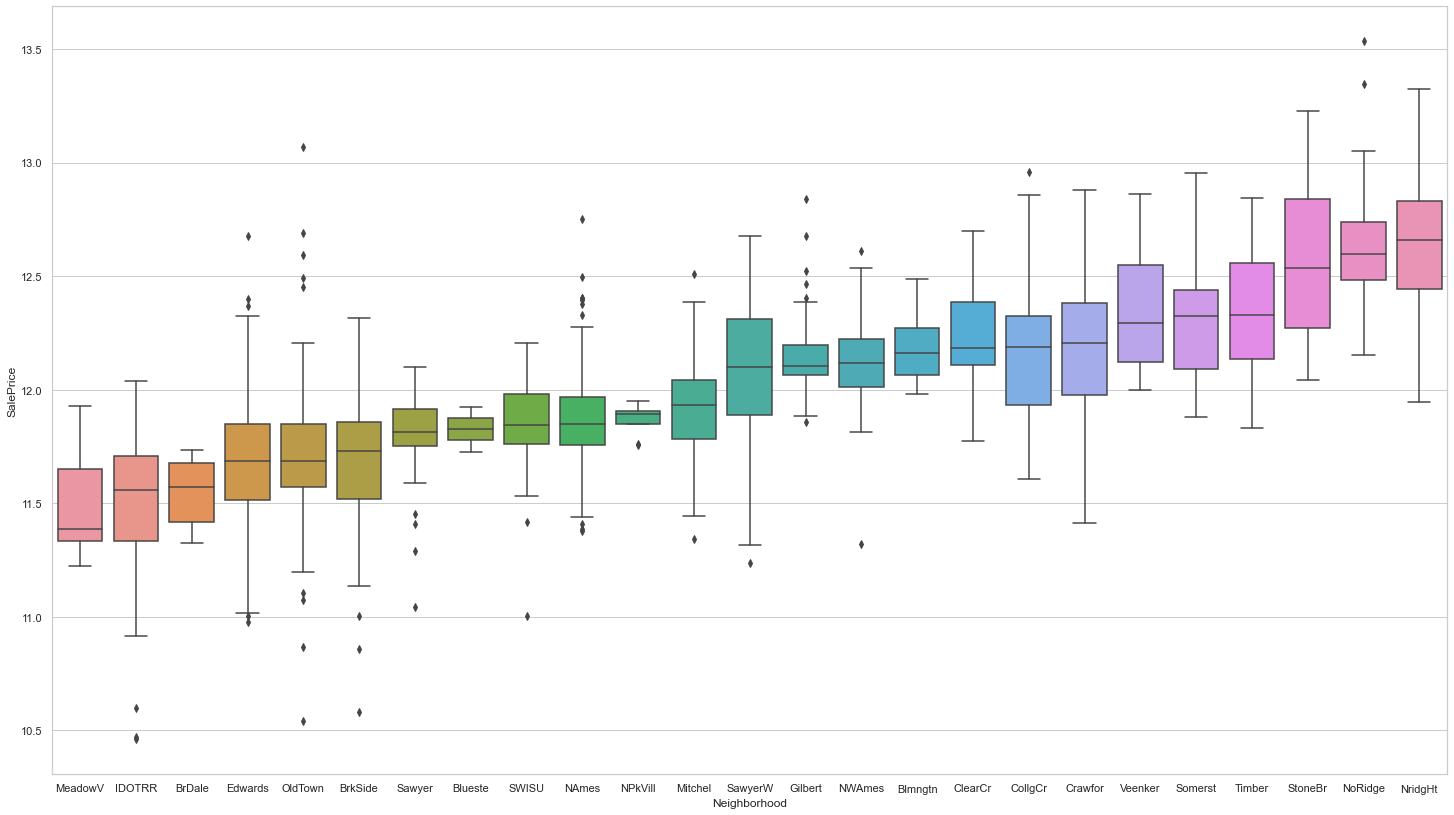

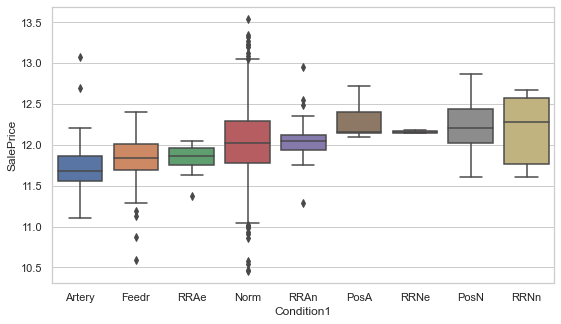

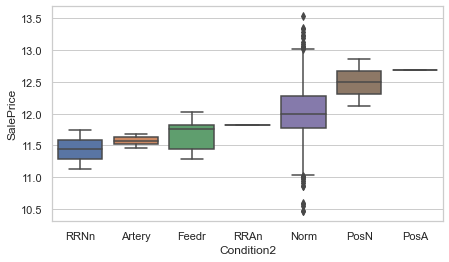

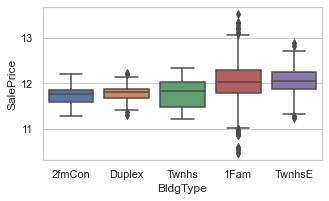

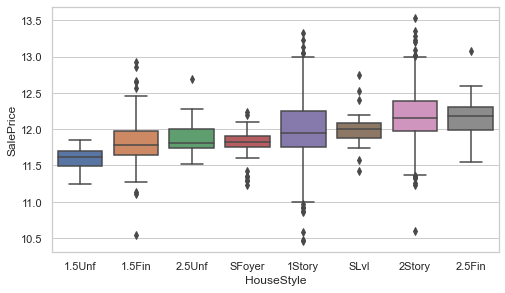

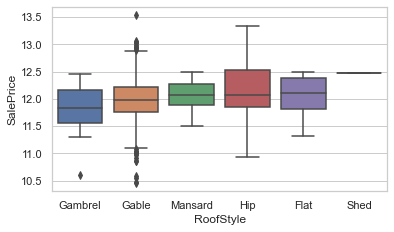

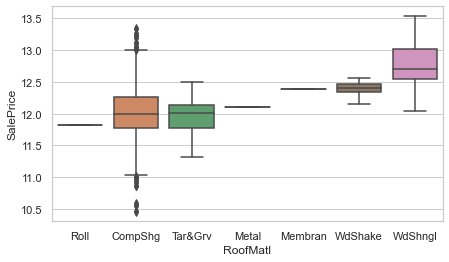

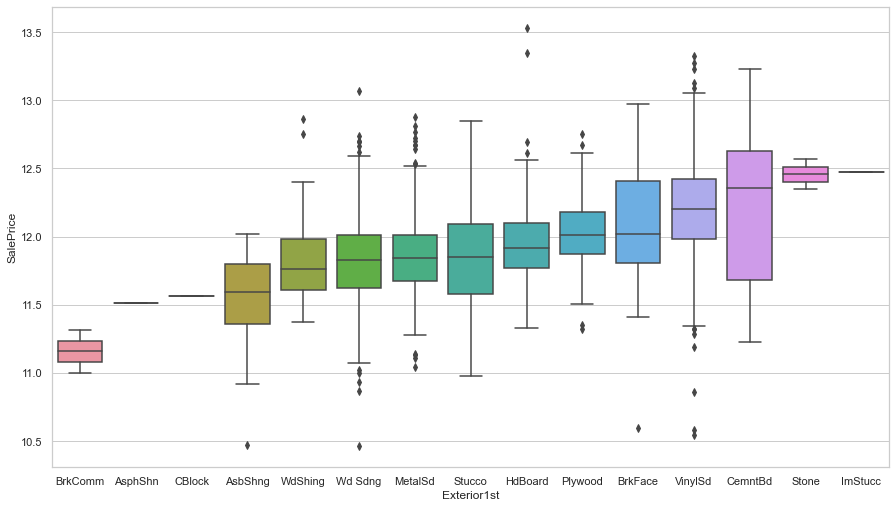

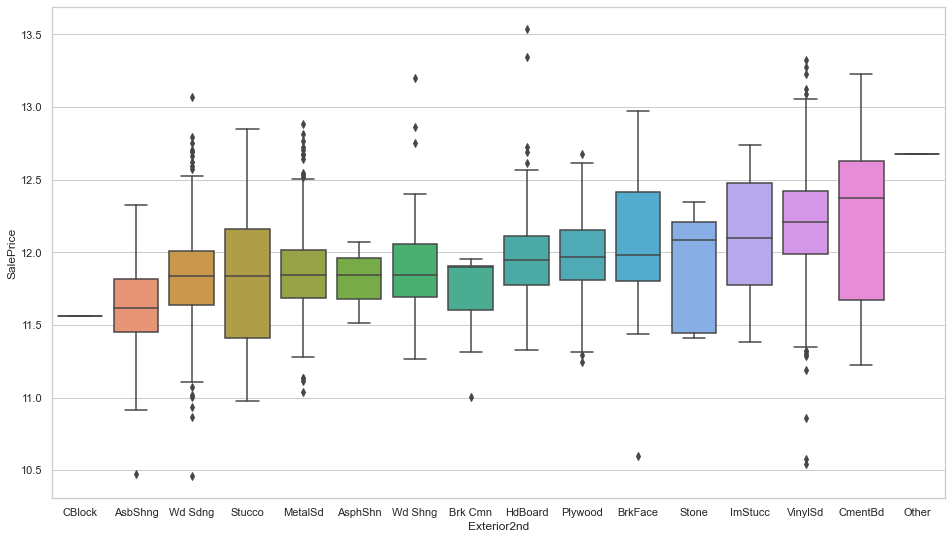

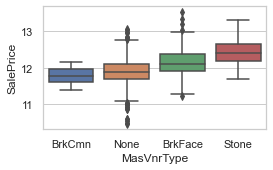

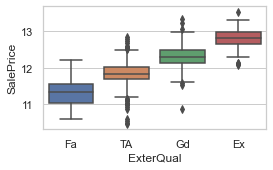

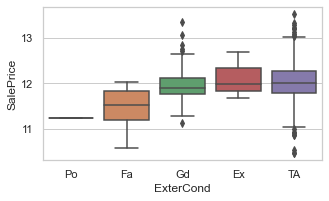

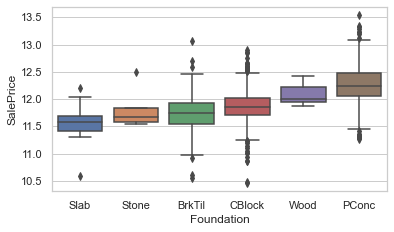

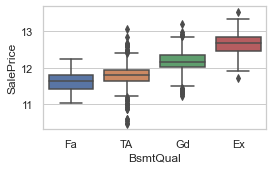

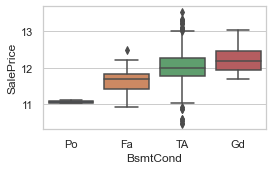

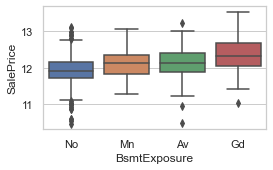

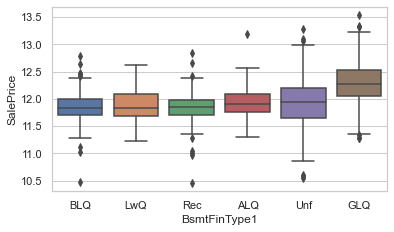

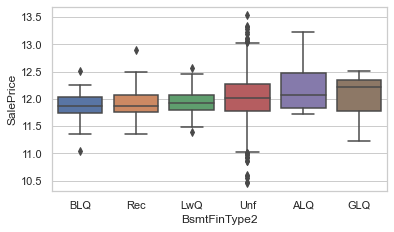

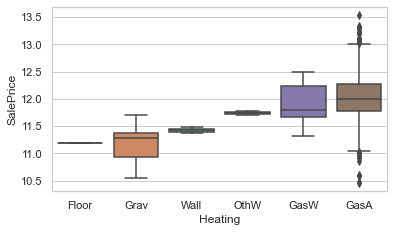

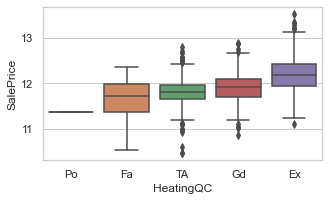

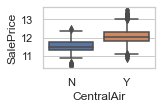

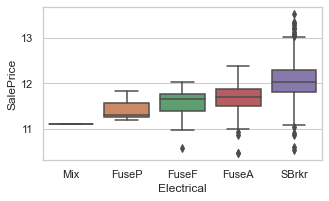

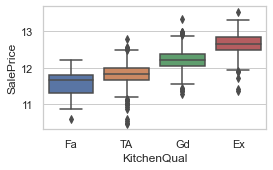

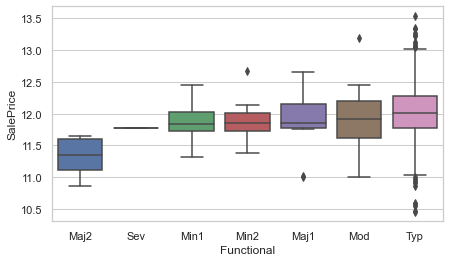

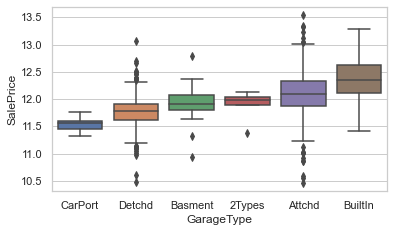

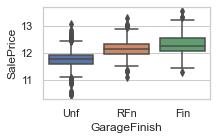

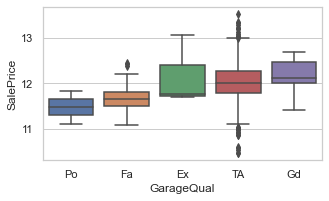

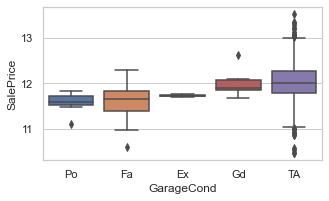

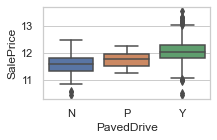

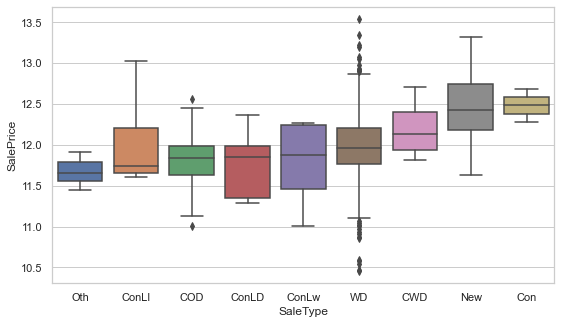

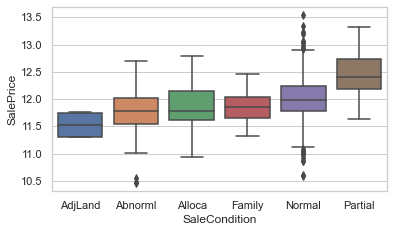

In [374]:
# ANALYSIS1 for categorical columns using box plot
for c, col in enumerate(cat_col):
    cat_col_plot1(c, col, tar_col)

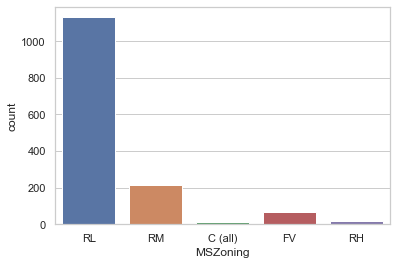

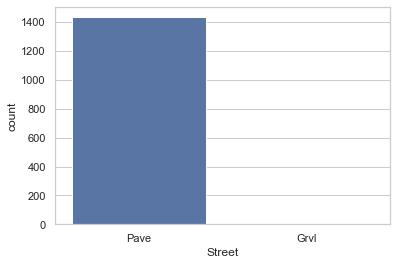

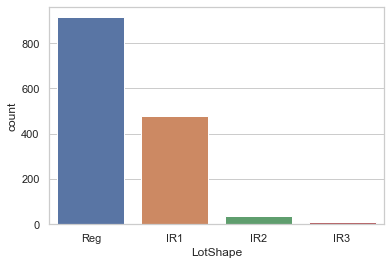

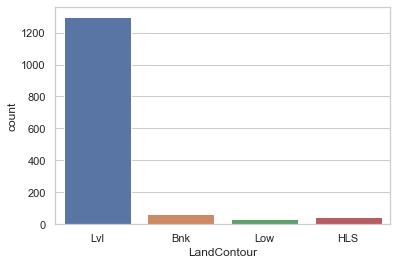

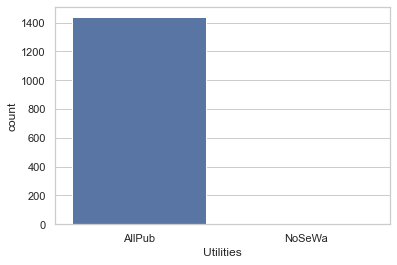

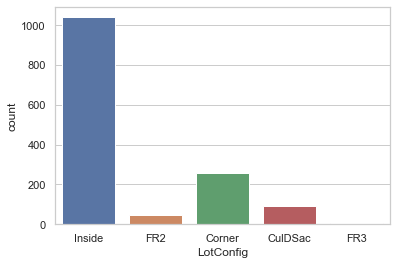

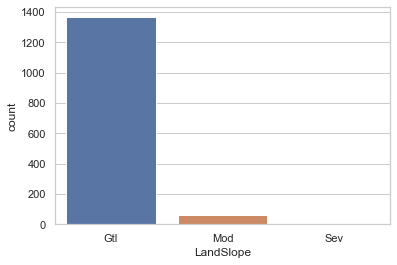

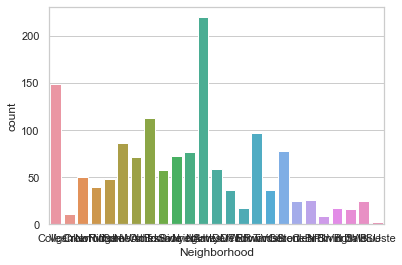

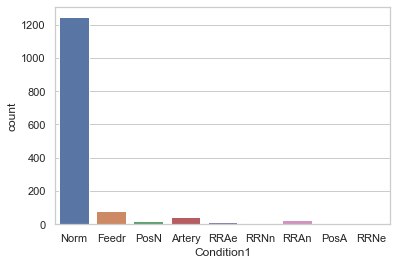

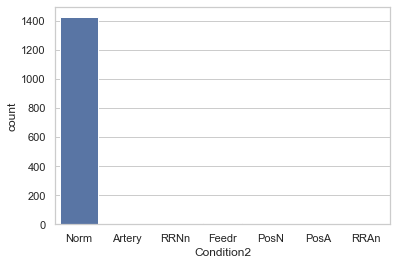

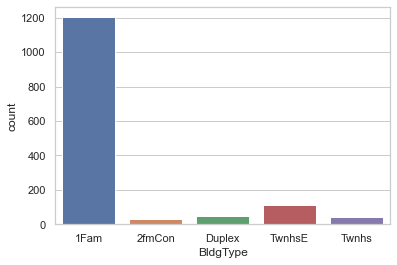

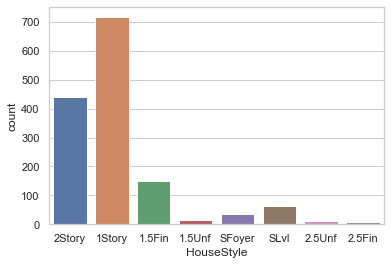

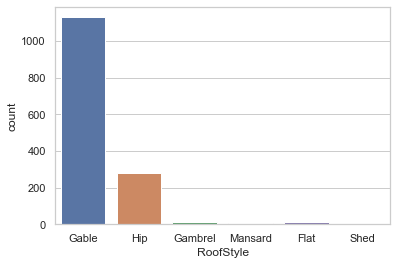

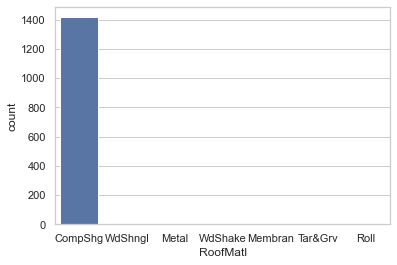

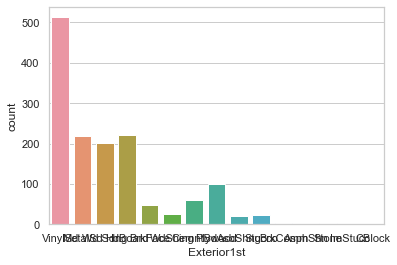

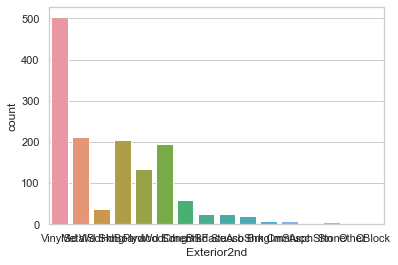

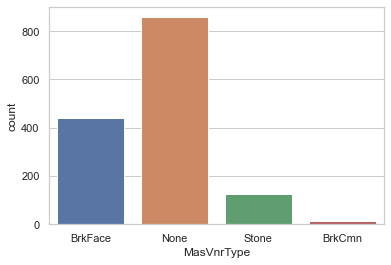

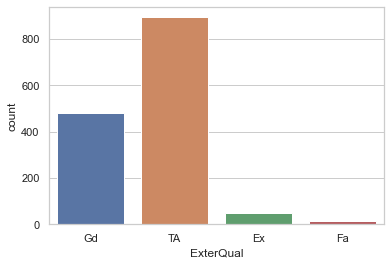

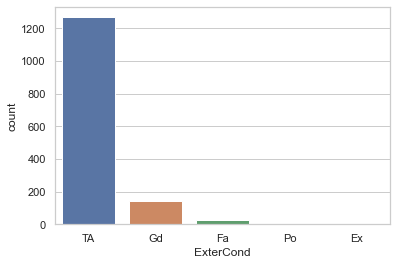

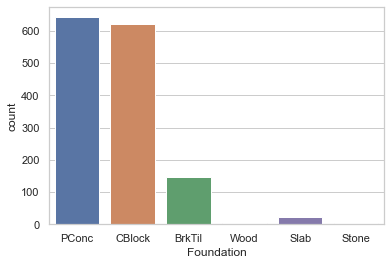

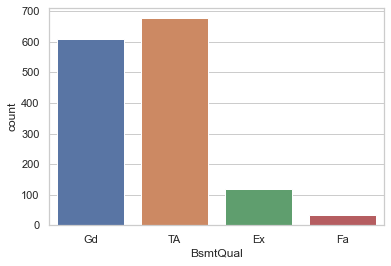

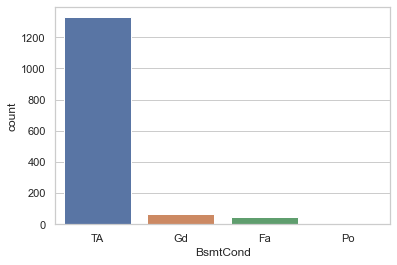

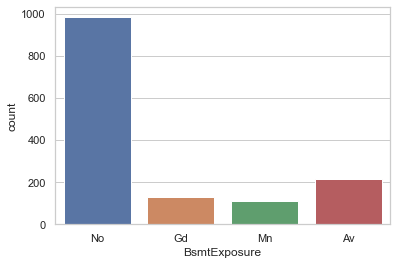

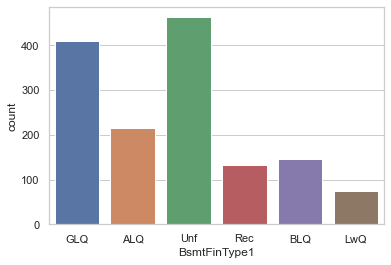

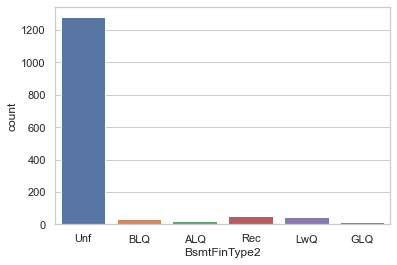

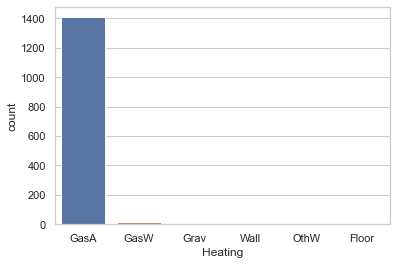

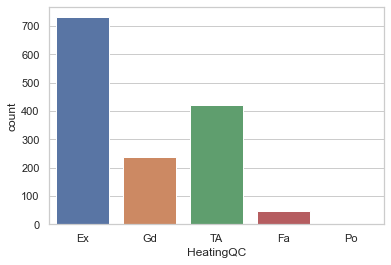

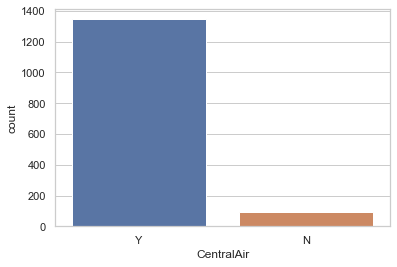

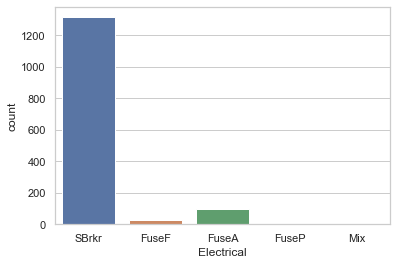

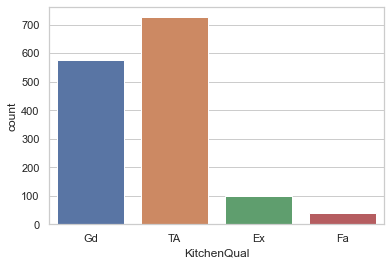

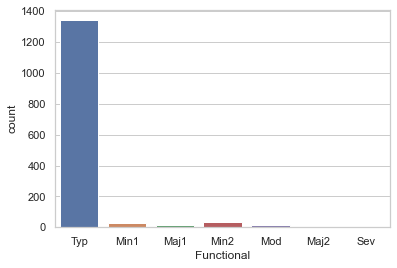

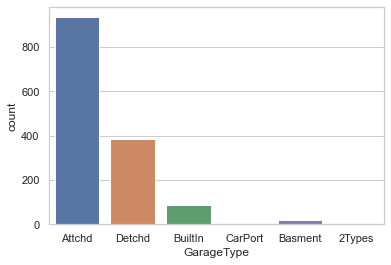

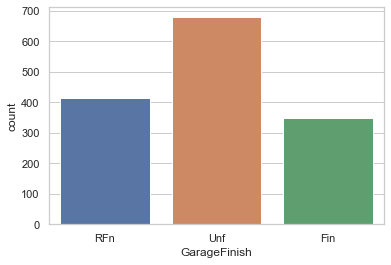

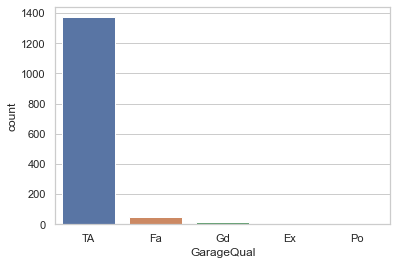

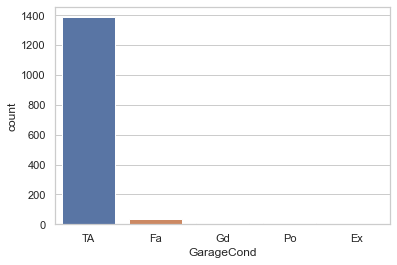

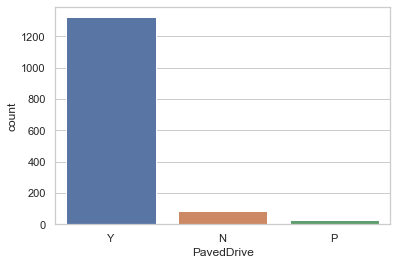

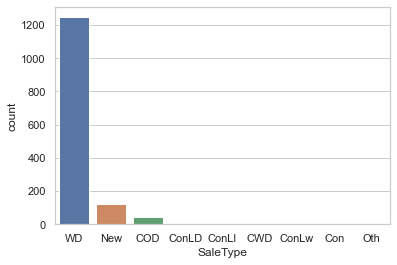

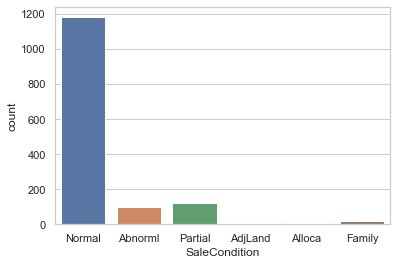

In [375]:
# ANALYSIS2 for categorical columns using count plot
for c, col in enumerate(cat_col):
    cat_col_plot2(c, col)

#### Insights:
- From the above plots many categorical features look like the sale price varies with category,and  there are many that don’t. 


### Identifying Categorical and Continious features.

In [376]:
inp0_df[list(inp0_df.dtypes[inp0_df.dtypes=='object'].index)].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### From the data dictionary we can see that some colmns which are categorical are orninal in nature.  So lets check for the below columns and we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [377]:
inp0_df[['LandSlope', 'BsmtQual','BsmtCond', 'GarageQual','GarageCond','ExterQual','HeatingQC','KitchenQual','ExterCond',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','CentralAir',  'GarageFinish','LotShape']].head()

,LandSlope,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,HeatingQC,KitchenQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,GarageFinish,LotShape
0,Gtl,Gd,TA,TA,TA,Gd,Ex,Gd,TA,No,GLQ,Unf,Y,RFn,Reg
1,Gtl,Gd,TA,TA,TA,TA,Ex,TA,TA,Gd,ALQ,Unf,Y,RFn,Reg
2,Gtl,Gd,TA,TA,TA,Gd,Ex,Gd,TA,Mn,GLQ,Unf,Y,RFn,IR1
3,Gtl,TA,Gd,TA,TA,TA,Gd,Gd,TA,No,ALQ,Unf,Y,Unf,IR1
4,Gtl,Gd,TA,TA,TA,Gd,Ex,Gd,TA,Av,GLQ,Unf,Y,RFn,IR1


In [378]:
# Map the ordinal variables

inp0_df['LandSlope'] = inp0_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})

inp0_df['BsmtQual'] = inp0_df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
inp0_df['BsmtCond'] = inp0_df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
inp0_df['GarageQual'] = inp0_df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
inp0_df['GarageCond'] = inp0_df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

inp0_df['BsmtExposure'] = inp0_df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})

inp0_df['BsmtFinType1'] = inp0_df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
inp0_df['BsmtFinType2'] = inp0_df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

inp0_df['ExterQual'] = inp0_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
inp0_df['HeatingQC'] = inp0_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
inp0_df['KitchenQual'] = inp0_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
inp0_df['ExterCond'] = inp0_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

inp0_df['CentralAir'] = inp0_df.CentralAir.map({'N':0,'Y':1})

inp0_df['GarageFinish'] = inp0_df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})


inp0_df['LotShape'] = inp0_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [379]:
# check the operation was success
inp0_df[['LandSlope', 'BsmtQual','BsmtCond', 'GarageQual','GarageCond','ExterQual','HeatingQC','KitchenQual','ExterCond',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','CentralAir',  'GarageFinish','LotShape']].head()

,LandSlope,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,HeatingQC,KitchenQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,GarageFinish,LotShape
0,0,4,3,3,3,3,4,3,2,1,6,1,1,2,3
1,0,4,3,3,3,2,4,2,2,4,5,1,1,2,3
2,0,4,3,3,3,3,4,3,2,2,6,1,1,2,0
3,0,3,4,3,3,2,3,3,2,1,5,1,1,1,0
4,0,4,3,3,3,3,4,3,2,3,6,1,1,2,0


#### Handle Binary columns for Categorical features
- We will check columns for significant data imbalance
- We will check for those columns that have only 1 unique entry and drop it.

In [380]:
# Determine unique values
for k, v in inp0_df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

MSZoning = 5
Street = 2
LandContour = 4
Utilities = 2
LotConfig = 5
Neighborhood = 25
Condition1 = 9
Condition2 = 7
BldgType = 5
HouseStyle = 8
RoofStyle = 6
RoofMatl = 7
Exterior1st = 15
Exterior2nd = 16
MasVnrType = 4
Foundation = 6
Heating = 6
Electrical = 5
Functional = 7
GarageType = 6
PavedDrive = 3
SaleType = 9
SaleCondition = 6


#### Insights:
- There are no columns with just 1 unique values. So cant drop any.
- Let's now check the data imbalance for the rest of the columns

In [381]:
# select rest of the binary columns in a new dataframe
inp0_df_bin = inp0_df[['Street', 'Utilities','CentralAir']]

# see value counts for each of the columns
for i in inp0_df_bin.columns:
    x = (inp0_df_bin[i].value_counts(normalize = True)) * 100
    print(x)
  

Pave    99.652536
Grvl     0.347464
Name: Street, dtype: float64
AllPub    99.930507
NoSeWa     0.069493
Name: Utilities, dtype: float64
1    93.467686
0     6.532314
Name: CentralAir, dtype: float64


#### Insights: 
Because of heavy data imbalance for the  binaray columns 'Street' and 'Utilities', we can drop the following columns.

In [382]:
# Drop the columns as per the above observation.
drop_bin = ['Street', 'Utilities']

inp0_df.drop(drop_bin, axis = 1, inplace = True)

#### Lets check for the categorical columns which have more categories which can be converted to a new category.

In [383]:
# select rest of the binary columns in a new dataframe
inp0_df_bin1 = inp0_df[['Neighborhood','Condition1','Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                        'Heating','Functional','SaleType','SaleCondition']]

# see value counts for each of the columns
for i in inp0_df_bin1.columns:
    x = (inp0_df_bin1[i].value_counts(normalize = True)) * 100
    print(x)

NAmes      15.288395
CollgCr    10.354413
OldTown     7.852675
Edwards     6.740792
Somerst     5.976372
Gilbert     5.420431
NridgHt     5.350938
Sawyer      5.072967
NWAmes      4.933982
SawyerW     4.100069
BrkSide     4.030577
Crawfor     3.474635
Mitchel     3.335650
NoRidge     2.779708
IDOTRR      2.501737
Timber      2.501737
ClearCr     1.806810
StoneBr     1.737318
SWISU       1.737318
Blmngtn     1.181376
MeadowV     1.181376
BrDale      1.111883
Veenker     0.764420
NPkVill     0.625434
Blueste     0.138985
Name: Neighborhood, dtype: float64
Norm      86.518416
Feedr      5.489924
Artery     3.196664
RRAn       1.737318
PosN       1.320361
RRAe       0.764420
PosA       0.486449
RRNn       0.347464
RRNe       0.138985
Name: Condition1, dtype: float64
Norm      99.027102
Feedr      0.416956
Artery     0.138985
RRNn       0.138985
PosN       0.138985
RRAn       0.069493
PosA       0.069493
Name: Condition2, dtype: float64
Gable      78.526755
Hip        19.388464
Flat        

In [384]:
# categorize all RoofStyle having very less counts to Others
inp0_df.loc[(inp0_df.RoofStyle == 'Gambrel') | (inp0_df.RoofStyle == 'Flat') | (inp0_df.RoofStyle == 'Mansard') | (inp0_df.RoofStyle == 'Shed') ,  
       'RoofStyle'] = 'Others'

# categorize all small categories in Condition1 to others
inp0_df.loc[(inp0_df.Condition1 == 'RRAe') | (inp0_df.Condition1 == 'PosA') | (inp0_df.Condition1 == 'RRNn') | (inp0_df.Condition1 == 'RRNe') , 
       'Condition1'] = 'Others'

# categorize all RoofMatl having very less counts to Others
inp0_df.loc[(inp0_df.RoofMatl == 'Tar&Grv') | (inp0_df.RoofMatl == 'WdShngl') | (inp0_df.RoofMatl == 'WdShake') | (inp0_df.RoofMatl == 'Metal') | 
            (inp0_df.RoofMatl == 'Roll') | (inp0_df.RoofMatl == 'Membran'),  
       'RoofMatl'] = 'Others'

# categorize all small categories in Condition2 to others
inp0_df.loc[(inp0_df.Condition2 == 'Feedr') | (inp0_df.Condition2 == 'Artery') | (inp0_df.Condition2 == 'PosN') | (inp0_df.Condition2 == 'RRNn') | 
            (inp0_df.Condition2 == 'RRAn') | (inp0_df.Condition2 == 'PosA') , 
       'Condition2'] = 'Others'

# categorize all Exterior1st having very less counts to Others
inp0_df.loc[(inp0_df.Exterior1st == 'BrkComm') | (inp0_df.Exterior1st == 'Stone') | (inp0_df.Exterior1st == 'ImStucc') | (inp0_df.Exterior1st == 'CBlock') | 
            (inp0_df.Exterior1st == 'AsphShn') ,  
       'Exterior1st'] = 'Others'

# categorize all Exterior2nd having very less counts to Others
inp0_df.loc[(inp0_df.Exterior2nd == 'BrkComm') | (inp0_df.Exterior2nd == 'Stone') | (inp0_df.Exterior2nd == 'ImStucc') | (inp0_df.Exterior2nd == 'CBlock') | 
            (inp0_df.Exterior2nd == 'AsphShn') | (inp0_df.Exterior2nd == 'Other') ,  
       'Exterior2nd'] = 'Others'

# categorize all SaleType having very less counts to Others
inp0_df.loc[(inp0_df.SaleType == 'ConLD') | (inp0_df.SaleType == 'ConLw') | (inp0_df.SaleType == 'ConLI') | (inp0_df.SaleType == 'CWD') | 
            (inp0_df.SaleType == 'Con') | (inp0_df.SaleType == 'Oth') ,  
       'SaleType'] = 'Others'

# categorize all Functional having very less counts to Others
inp0_df.loc[(inp0_df.Functional == 'Mod') | (inp0_df.Functional == 'Maj1') | (inp0_df.Functional == 'Maj2') | (inp0_df.Functional == 'Sev') ,  
       'Functional'] = 'Others'

# categorize all Heating having very less counts to Others
inp0_df.loc[(inp0_df.Heating == 'Grav') | (inp0_df.Heating == 'Wall') | (inp0_df.Heating == 'Floor') | (inp0_df.Heating == 'OthW') ,  
       'Heating'] = 'Others'



In [385]:
# select rest of the binary columns in a new dataframe
inp0_df_bin2 = inp0_df[['Neighborhood','Condition1','Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                        'Heating','Functional','SaleType','SaleCondition']]

# see value counts for each of the columns
for i in inp0_df_bin2.columns:
    x = (inp0_df_bin2[i].value_counts(normalize = True)) * 100
    print(x)

NAmes      15.288395
CollgCr    10.354413
OldTown     7.852675
Edwards     6.740792
Somerst     5.976372
Gilbert     5.420431
NridgHt     5.350938
Sawyer      5.072967
NWAmes      4.933982
SawyerW     4.100069
BrkSide     4.030577
Crawfor     3.474635
Mitchel     3.335650
NoRidge     2.779708
IDOTRR      2.501737
Timber      2.501737
ClearCr     1.806810
StoneBr     1.737318
SWISU       1.737318
Blmngtn     1.181376
MeadowV     1.181376
BrDale      1.111883
Veenker     0.764420
NPkVill     0.625434
Blueste     0.138985
Name: Neighborhood, dtype: float64
Norm      86.518416
Feedr      5.489924
Artery     3.196664
RRAn       1.737318
Others     1.737318
PosN       1.320361
Name: Condition1, dtype: float64
Norm      99.027102
Others     0.972898
Name: Condition2, dtype: float64
Gable     78.526755
Hip       19.388464
Others     2.084781
Name: RoofStyle, dtype: float64
CompShg    98.401668
Others      1.598332
Name: RoofMatl, dtype: float64
VinylSd    35.649757
HdBoard    15.288395
MetalSd

#### Insights:
Because of heavy data imbalance for the columns 'Condition2' and 'RoofMatl', we can drop the following columns.

In [386]:
# Drop the columns as per the above observation.
drop_bin1 = ['Condition2', 'RoofMatl']

inp0_df.drop(drop_bin1, axis = 1, inplace = True)

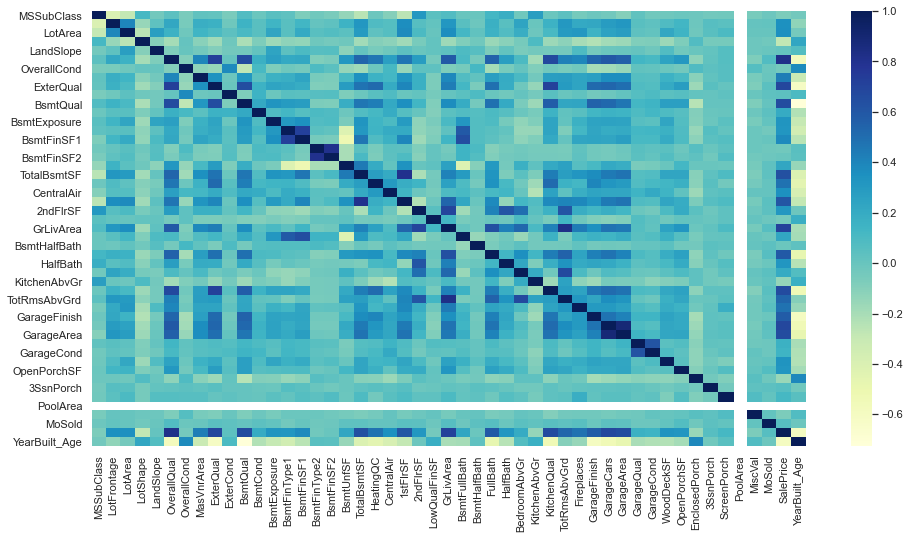

In [387]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(inp0_df.corr(), cmap="YlGnBu", annot=False)
plt.show()

#### Insights:
- There plots above shows there may exist some linear relationship between various columns and output column. We can see the heatmap is condensed however we do have collinearity in data hence feature selection is necessary.

#### For categorical variables with multiple levels, we will create dummy features (one-hot encoded)

In [388]:
dummy_col = pd.get_dummies(inp0_df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)
dummy_col.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Others,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [389]:
# Adding the results to the master dataframe
inp0_df = pd.concat([inp0_df, dummy_col], axis=1)
inp0_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Others,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,Attchd,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,Attchd,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,0,Lvl,Inside,0,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,Attchd,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,0,Lvl,Corner,0,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,Detchd,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,0,Lvl,FR2,0,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,Attchd,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [390]:
# drop the initial columns for which we have already created dummies
inp0_df = inp0_df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [391]:
inp0_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Data columns (total 155 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             int64  
 1   LotFrontage            float64
 2   LotArea                int64  
 3   LotShape               int64  
 4   LandSlope              int64  
 5   OverallQual            int64  
 6   OverallCond            int64  
 7   MasVnrArea             float64
 8   ExterQual              int64  
 9   ExterCond              int64  
 10  BsmtQual               int64  
 11  BsmtCond               int64  
 12  BsmtExposure           int64  
 13  BsmtFinType1           int64  
 14  BsmtFinSF1             int64  
 15  BsmtFinType2           int64  
 16  BsmtFinSF2             int64  
 17  BsmtUnfSF              int64  
 18  TotalBsmtSF            int64  
 19  HeatingQC              int64  
 20  CentralAir             int64  
 21  1stFlrSF               int64  
 22  2ndFlrSF               

### Splitting the Data into Training and Testing Sets

#### Spliting the dependent and independent variable


In [392]:
# Putting feature variable to X
X = inp0_df.drop(['SalePrice'], axis=1)


In [393]:
# Putting response variable to y
y = inp0_df['SalePrice']

In [394]:
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,MSZoning_FV,MSZoning_RH,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Others,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,0,0,0,0,2,18,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,0,0,0,0,5,45,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,2,2,608,3,3,0,42,0,0,0,0,0,9,20,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,3,642,3,3,0,35,272,0,0,0,0,2,106,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,8,5,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,2,3,836,3,3,192,84,0,0,0,0,0,12,21,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [395]:
# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state = 42)

In [396]:
X_train.shape

(1007, 154)

In [397]:
X_test.shape

(432, 154)

### Feature Scaling

In [398]:
# Feature Scaling sing MinMaxScaler
scaler = MinMaxScaler()


In [399]:
# Checking the values before scaling
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,MSZoning_FV,MSZoning_RH,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Others,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
96,20,78.0,10264,0,0,7,5,183.0,3,2,4,3,3,5,1162,1,0,426,1588,4,1,1588,0,0,1588,0,0,2,0,3,1,3,6,0,2,2,472,3,3,158,29,0,0,0,0,0,8,22,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1180,60,69.0,11170,1,0,7,5,0.0,2,2,4,3,1,2,1216,1,0,0,1216,4,1,1298,1216,0,2514,0,0,2,1,4,1,2,8,0,3,2,693,3,3,0,0,0,0,0,0,0,4,31,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
445,20,73.0,9855,3,0,6,5,0.0,2,2,3,3,1,1,0,1,0,1436,1436,1,1,1689,0,0,1689,0,0,1,0,3,1,2,7,1,1,2,480,3,3,0,0,0,0,0,0,0,11,65,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1117,20,57.0,9764,0,0,5,7,0.0,2,2,3,3,1,4,702,1,0,192,894,4,1,894,0,0,894,1,0,1,0,3,1,3,5,0,2,2,450,3,3,0,0,0,0,0,0,0,5,54,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
416,60,74.0,7844,3,0,6,7,203.0,2,2,3,3,1,5,209,1,0,463,672,2,1,672,728,0,1400,0,0,1,1,3,1,2,6,1,3,2,440,3,3,0,0,0,0,0,0,0,3,43,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [400]:
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YearBuilt_Age']

In [401]:
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [402]:
# After scaling
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,MSZoning_FV,MSZoning_RH,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Others,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
96,0.000000,0.354037,0.129051,0,0,0.666667,0.50,0.114375,3,2,4,3,3,5,0.514159,1,0.0,0.182363,0.495321,4,1,0.447218,0.000000,0.0,0.288807,0.0,0.0,0.666667,0.0,0.375,0.333333,3,0.333333,0.000000,2,0.5,0.348083,3,3,0.184364,0.053016,0.0,0.0,0.0,0.0,0.0,0.636364,0.081481,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1180,0.235294,0.298137,0.142094,1,0,0.666667,0.50,0.000000,2,2,4,3,1,2,0.538053,1,0.0,0.000000,0.379289,4,1,0.343795,0.649573,0.0,0.502073,0.0,0.0,0.666667,0.5,0.500,0.333333,2,0.500000,0.000000,3,0.5,0.511062,3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.272727,0.148148,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
445,0.000000,0.322981,0.123163,3,0,0.555556,0.50,0.000000,2,2,3,3,1,1,0.000000,1,0.0,0.614726,0.447910,1,1,0.483238,0.000000,0.0,0.312068,0.0,0.0,0.333333,0.0,0.375,0.333333,2,0.416667,0.333333,1,0.5,0.353982,3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.909091,0.400000,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1117,0.000000,0.223602,0.121853,0,0,0.444444,0.75,0.000000,2,2,3,3,1,4,0.310619,1,0.0,0.082192,0.278852,4,1,0.199715,0.000000,0.0,0.128973,0.5,0.0,0.333333,0.0,0.375,0.333333,3,0.250000,0.000000,2,0.5,0.331858,3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.318519,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
416,0.235294,0.329193,0.094211,3,0,0.555556,0.75,0.126875,2,2,3,3,1,5,0.092478,1,0.0,0.198202,0.209607,2,1,0.120542,0.388889,0.0,0.245509,0.0,0.0,0.333333,0.5,0.375,0.333333,2,0.333333,0.333333,3,0.5,0.324484,3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.181818,0.237037,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [403]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,MSZoning_FV,MSZoning_RH,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Others,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
168,60,62.0,8244,0,0,7,5,0.0,3,2,4,3,1,1,0,1,0,840,840,4,1,840,880,0,1720,0,0,2,1,3,1,3,7,1,3,2,440,3,3,100,48,0,0,0,0,0,5,17,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
613,20,70.0,8402,3,0,5,5,0.0,2,2,4,3,1,5,206,1,0,914,1120,4,1,1120,0,0,1120,0,0,1,0,3,1,2,6,0,1,0,0,3,3,0,30,0,0,0,0,0,12,14,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
556,20,69.0,14850,0,0,5,5,0.0,2,2,3,3,1,3,895,1,0,197,1092,2,1,1092,0,0,1092,1,0,1,0,2,1,2,6,1,3,1,299,3,3,268,0,0,0,122,0,0,5,64,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
65,60,76.0,9591,3,0,8,5,344.0,3,2,5,3,3,1,0,1,0,1143,1143,4,1,1143,1330,0,2473,0,0,2,1,4,1,3,9,1,2,3,852,3,3,192,151,0,0,0,0,0,10,17,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
636,30,51.0,6120,3,0,2,3,0.0,1,1,3,2,1,1,0,1,0,264,264,1,0,800,0,0,800,0,0,1,0,1,1,1,4,1,1,0,0,3,3,0,0,0,0,0,0,0,1,85,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [404]:
X_test[num_col] = scaler.transform(X_test[num_col])

In [405]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,MSZoning_FV,MSZoning_RH,...,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Others,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
168,0.235294,0.254658,0.099970,0,0,0.666667,0.50,0.000,3,2,4,3,1,1,0.000000,1,0.0,0.359589,0.262009,4,1,0.180456,0.470085,0.0,0.319208,0.0,0.0,0.666667,0.5,0.375,0.333333,3,0.416667,0.333333,3,0.50,0.324484,3,3,0.116686,0.087751,0.0,0.0,0.000000,0.0,0.0,0.363636,0.044444,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
613,0.000000,0.304348,0.102244,3,0,0.444444,0.50,0.000,2,2,4,3,1,5,0.091150,1,0.0,0.391267,0.349345,4,1,0.280314,0.000000,0.0,0.181023,0.0,0.0,0.333333,0.0,0.375,0.333333,2,0.333333,0.000000,1,0.00,0.000000,3,3,0.000000,0.054845,0.0,0.0,0.000000,0.0,0.0,1.000000,0.022222,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
556,0.000000,0.298137,0.195073,0,0,0.444444,0.50,0.000,2,2,3,3,1,3,0.396018,1,0.0,0.084332,0.340611,2,1,0.270328,0.000000,0.0,0.174574,0.5,0.0,0.333333,0.0,0.250,0.333333,2,0.333333,0.333333,3,0.25,0.220501,3,3,0.312719,0.000000,0.0,0.0,0.254167,0.0,0.0,0.363636,0.392593,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
65,0.235294,0.341615,0.119362,3,0,0.777778,0.50,0.215,3,2,5,3,3,1,0.000000,1,0.0,0.489298,0.356519,4,1,0.288516,0.710470,0.0,0.492630,0.0,0.0,0.666667,0.5,0.500,0.333333,3,0.583333,0.333333,2,0.75,0.628319,3,3,0.224037,0.276051,0.0,0.0,0.000000,0.0,0.0,0.818182,0.044444,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
636,0.058824,0.186335,0.069391,3,0,0.111111,0.25,0.000,1,1,3,2,1,1,0.000000,1,0.0,0.113014,0.082346,1,0,0.166191,0.000000,0.0,0.107324,0.0,0.0,0.333333,0.0,0.125,0.333333,1,0.166667,0.333333,1,0.00,0.000000,3,3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.548148,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Model Building

#### We have around 154 features, Now using RFE lets try to to find the optimal number of feature.

#### Feature Selection Using RFE

In [406]:
# Running RFE with the output number of the variable equal to 50
# initiate Linear regression
lm  = LinearRegression()
lm.fit(X_train,y_train)

# initiate rfe
rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [407]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,

In [408]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 54),
 ('LotFrontage', False, 23),
 ('LotArea', True, 1),
 ('LotShape', False, 96),
 ('LandSlope', False, 41),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 60),
 ('ExterQual', False, 99),
 ('ExterCond', False, 101),
 ('BsmtQual', False, 55),
 ('BsmtCond', False, 79),
 ('BsmtExposure', False, 76),
 ('BsmtFinType1', False, 104),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 100),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 78),
 ('CentralAir', False, 14),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 52),
 ('FullBath', False, 9),
 ('HalfBath', False, 19),
 ('BedroomAbvGr', False, 47),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 63),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 84),
 ('GarageCars', True, 1),
 ('GarageArea', Fals

In [409]:
col = X_train.columns[rfe.support_]

In [410]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotShape', 'LandSlope', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       ...
       'Electrical_FuseP', 'Electrical_SBrkr', 'Functional_Min2',
       'Functional_Others', 'GarageType_CarPort', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_WD', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=104)

In [411]:
# Lets filter the columns that we get from rfe
X_train = X_train[col]
X_test = X_test[col]

In [412]:
X_train.shape

(1007, 50)

In [413]:
X_test.shape

(432, 50)

### Lets perform  Linear Regression

In [414]:
# linear regression with all predictors that we get from Rfe

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
X_test_lm = sm.add_constant(X_test)

print('Linear Regression Matrices')
# predict train
y_train_pred = lm.predict(X_train_lm)
print('R2 Score(Train):',r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test_lm)
print('R2 Score(Test):',r2_score(y_true=y_test, y_pred=y_test_pred))

Linear Regression Matrices
R2 Score(Train): 0.9167834086173431
R2 Score(Test): 0.893050734432299


In [415]:
#Residual Sum of Squares 
rss_train = np.sum(np.square(y_train - y_train_pred))
print('Linear Regression Matrices')
print('rss(Train):',rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred))  
print('rss(Test):',rss_test)      

#mean_squared_error

# train
print('mse(Train):',mean_squared_error(y_true=y_train, y_pred=y_train_pred))
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
rmse_train = mse_train**0.5      
# test
print('mse(Test):',mean_squared_error(y_true=y_test, y_pred=y_test_pred))
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
rmse_test = mse_test**0.5 
# Root Mean Squared Error

print('rmse(train):',rmse_train)
print('rmse(test):',rmse_test)      

Linear Regression Matrices
rss(Train): 13.315852415662778
rss(Test): 7.120370882847562
mse(Train): 0.013223289389933246
mse(Test): 0.016482340006591576
rmse(train): 0.11499256232440969
rmse(test): 0.12838356595215594


#### Insights: 
Linear Regression Matrices
- R2 Score(Train): 0.9167834086173431
- R2 Score(Test): 0.893050734432299
- rss(Train): 13.315852415662778
- rss(Test): 7.120370882847562
- mse(Train): 0.013223289389933246
- mse(Test): 0.016482340006591576
- rmse(train): 0.11499256232440969
- rmse(test): 0.12838356595215594

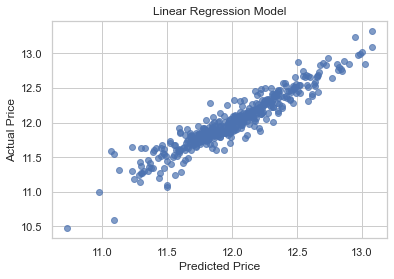

In [416]:
actual_values = y_test
predictions = y_test_pred
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [417]:
# Parameters of the Linear regression model ith rfe
lm.params

const                    10.291082
LotArea                   0.263115
OverallQual               0.534604
OverallCond               0.359260
BsmtFinSF1                0.168337
BsmtFinSF2                0.073285
BsmtUnfSF                 0.039487
TotalBsmtSF               0.181131
1stFlrSF                  0.487034
2ndFlrSF                  0.301161
LowQualFinSF              0.057483
GrLivArea                 0.451934
BsmtFullBath              0.089982
KitchenAbvGr             -0.265944
TotRmsAbvGrd              0.081613
Fireplaces                0.074404
GarageCars                0.266763
WoodDeckSF                0.121560
ScreenPorch               0.138957
YearBuilt_Age            -0.377938
MSZoning_FV               0.406044
MSZoning_RH               0.444213
MSZoning_RL               0.384438
MSZoning_RM               0.334037
LotConfig_FR3            -0.076140
Neighborhood_Blueste     -0.135973
Neighborhood_Crawfor      0.181094
Neighborhood_Edwards     -0.092637
Neighborhood_NridgHt

#### Insights:
- This Simple Linear Regression model with Rfe gave us a complex model with most of the coefficients as non-zero values and has 50 feature. So we will check for the other regression models.

### Lets perform the ridge regression

In [418]:
# Now lets try our model with the optimal value of alpha using GridSearchCV
folds  = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [419]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006251,0.007655,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.914609,0.917075,0.708492,0.925901,0.925931,0.878402,0.085078,19,0.914420,0.914282,0.942626,0.911088,0.911716,0.918827,0.011974
1,0.009375,0.007654,0.003125,0.006250,0.0010,{'alpha': 0.001},0.914623,0.917077,0.708577,0.925902,0.925928,0.878421,0.085045,18,0.914420,0.914282,0.942626,0.911088,0.911716,0.918827,0.011974
2,0.007343,0.007051,0.004727,0.006270,0.0100,{'alpha': 0.01},0.914760,0.917093,0.709402,0.925916,0.925894,0.878613,0.084726,17,0.914419,0.914282,0.942624,0.911087,0.911715,0.918825,0.011974
3,0.006401,0.003201,0.003200,0.003920,0.0500,{'alpha': 0.05},0.915260,0.917149,0.712745,0.925937,0.925731,0.879364,0.083423,16,0.914395,0.914265,0.942582,0.911068,0.911695,0.918801,0.011965
4,0.008001,0.005062,0.004800,0.003919,0.1000,{'alpha': 0.1},0.915699,0.917195,0.716309,0.925891,0.925507,0.880120,0.082012,14,0.914332,0.914219,0.942472,0.911017,0.911640,0.918736,0.011943


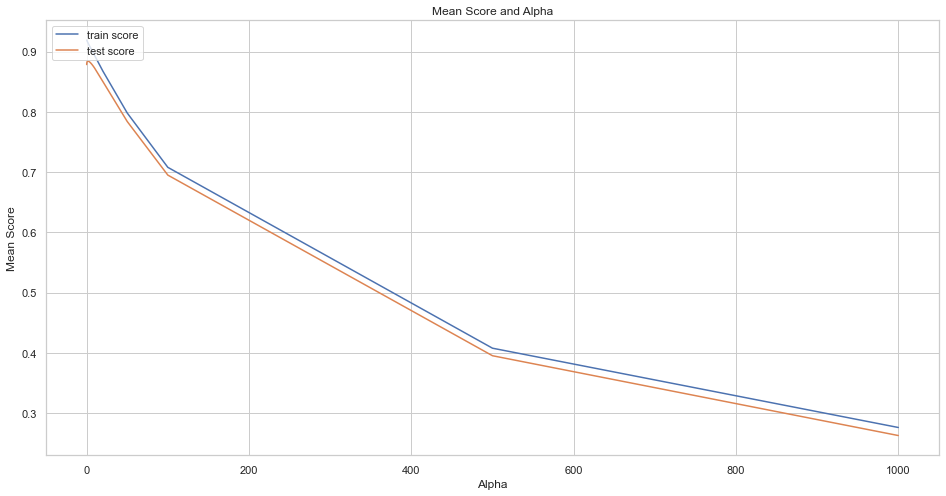

In [420]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Mean Score')
plt.title("Mean Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [421]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 2.0}

In [422]:
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

print('Ridge Regression Matrices')
# predict
y_train_pred = ridge.predict(X_train)
print('R2 Score(Train):',r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print('R2 Score(Test):',r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

Ridge Regression Matrices
R2 Score(Train): 0.9126504436007066
R2 Score(Test): 0.8976531232252188


In [423]:
print('Ridge Regression Matrices')
#Residual Sum of Squares 
rss_train = np.sum(np.square(y_train - y_train_pred))

print('rss(Train):',rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred_ridge))  
print('rss(Test):',rss_test)      

#mean_squared_error

# train
print('mse(Train):',mean_squared_error(y_true=y_train, y_pred=y_train_pred))
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
rmse_train = mse_train**0.5      
# test
print('mse(Test):',mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge))
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge)
rmse_test = mse_test**0.5 
# Root Mean Squared Error

print('rmse(train):',rmse_train)
print('rmse(test):',rmse_test)      



Ridge Regression Matrices
rss(Train): 13.977186306972552
rss(Test): 6.813957229806569
mse(Train): 0.013880026124103825
mse(Test): 0.01577304914307076
rmse(train): 0.11781352267080306
rmse(test): 0.1255908003918709


#### Insights: Ridge
Ridge Regression Matrices
- R2 Score(Train): 0.9126504436007066
- R2 Score(Test): 0.8976531232252188
- rss(Train): 13.977186306972552
- rss(Test): 6.813957229806569
- mse(Train): 0.013880026124103825
- mse(Test): 0.01577304914307076
- rmse(train): 0.11781352267080306
- rmse(test): 0.1255908003918709

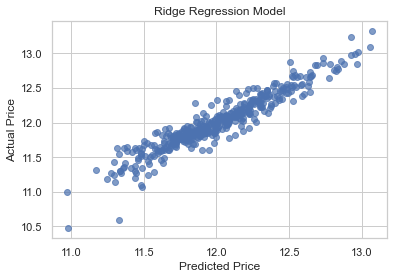

In [424]:
actual_values = y_test
predictions = y_test_pred_ridge
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')
plt.show()

In [425]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)


[(10.637, 'constant'),
 (0.534, 'OverallQual'),
 (0.375, '1stFlrSF'),
 (0.372, 'GrLivArea'),
 (-0.349, 'YearBuilt_Age'),
 (0.329, 'OverallCond'),
 (0.289, '2ndFlrSF'),
 (0.274, 'GarageCars'),
 (0.215, 'TotalBsmtSF'),
 (-0.196, 'KitchenAbvGr'),
 (0.19, 'LotArea'),
 (0.188, 'BsmtFinSF1'),
 (0.174, 'Neighborhood_Crawfor'),
 (0.162, 'MSZoning_RH'),
 (0.161, 'MSZoning_FV'),
 (0.154, 'MSZoning_RL'),
 (0.147, 'TotRmsAbvGrd'),
 (-0.147, 'Condition1_PosN'),
 (0.131, 'WoodDeckSF'),
 (0.127, 'ScreenPorch'),
 (0.125, 'SaleType_New'),
 (0.118, 'Neighborhood_NridgHt'),
 (0.107, 'Neighborhood_StoneBr'),
 (-0.104, 'BldgType_Twnhs'),
 (-0.103, 'Heating_Others'),
 (0.1, 'Fireplaces'),
 (0.096, 'BsmtFullBath'),
 (0.093, 'MSZoning_RM'),
 (0.091, 'GarageType_Attchd'),
 (0.089, 'SaleCondition_AdjLand'),
 (-0.085, 'Neighborhood_Edwards'),
 (0.082, 'Neighborhood_Somerst'),
 (0.081, 'GarageType_Detchd'),
 (0.08, 'SaleCondition_Normal'),
 (0.079, 'BsmtFinSF2'),
 (0.074, 'GarageType_BuiltIn'),
 (0.072, 'GarageTy

#### Insights:
This Ridge Regression model gave us a complex model with most of the coefficients as non-zero values although near to zero, bt not zero. Although it has improved the score but has not helped us in the feature selection.So we will check for the other regression models.

### Lets perform the Lasso regression model

In [426]:
model = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_param, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [427]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049492,0.017491,0.006250,0.007655,0.0001,{'alpha': 0.0001},0.916035,0.917475,0.724872,0.924066,0.924153,0.881320,0.078294,1,0.913293,0.913525,0.941594,0.910161,0.910784,0.917871,0.011935
1,0.009538,0.005910,0.000000,0.000000,0.0010,{'alpha': 0.001},0.907264,0.914287,0.745342,0.910958,0.912715,0.878113,0.066427,2,0.901364,0.898306,0.927244,0.897302,0.897128,0.904269,0.011588
2,0.009375,0.007654,0.003125,0.006250,0.0100,{'alpha': 0.01},0.794400,0.784536,0.731112,0.777194,0.796674,0.776783,0.023883,3,0.797127,0.782029,0.823394,0.780126,0.780339,0.792603,0.016652
3,0.006250,0.007655,0.003125,0.006250,0.0500,{'alpha': 0.05},0.110674,0.102498,0.114003,0.098781,0.084631,0.102117,0.010310,4,0.107231,0.111601,0.123513,0.120266,0.117348,0.115992,0.005877
4,0.003129,0.006257,0.000000,0.000000,0.1000,{'alpha': 0.1},-0.025120,-0.007330,-0.029428,-0.003477,-0.019234,-0.016918,0.010017,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


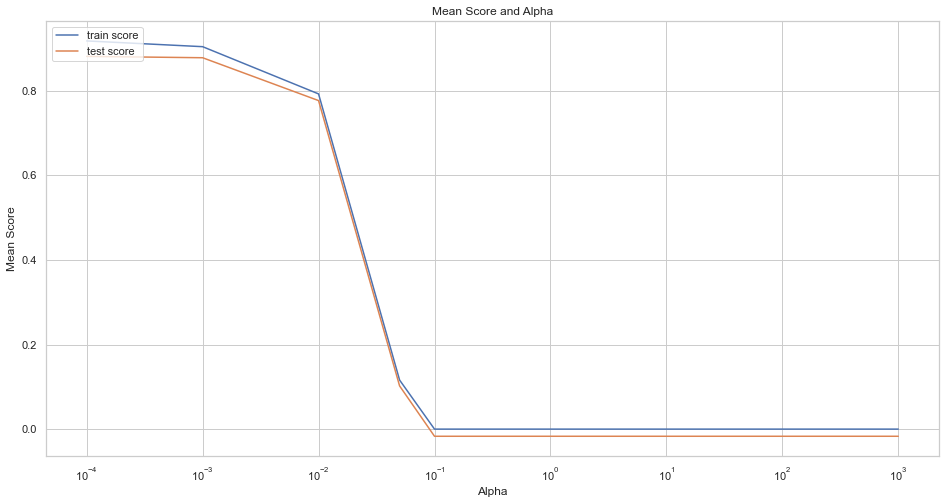

In [428]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('Mean Score')
plt.xlabel('Alpha')
plt.title("Mean Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [429]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [430]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

print('Lasso Regression Matrices')
# predict
y_train_pred = lasso.predict(X_train)
print('R2 Score(Train):',r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print('R2 Score(Train):',r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Lasso Regression Matrices
R2 Score(Train): 0.9157408893574097
R2 Score(Train): 0.8987489945332023


In [431]:
print('Lasso Regression Matrices')
#Residual Sum of Squares 
rss_train = np.sum(np.square(y_train - y_train_pred))

print('rss(Train):',rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred_lasso))  
print('rss(Test):',rss_test)      

#mean_squared_error

# train
print('mse(Train):',mean_squared_error(y_true=y_train, y_pred=y_train_pred))
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
rmse_train = mse_train**0.5      
# test
print('mse(Test):',mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso))
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso)
rmse_test = mse_test**0.5 
# Root Mean Squared Error

print('rmse(train):',rmse_train)
print('rmse(test):',rmse_test)      




Lasso Regression Matrices
rss(Train): 13.482670502958912
rss(Test): 6.740997307068492
mse(Train): 0.013388947867883727
mse(Test): 0.015604160433028915
rmse(train): 0.11571062124059193
rmse(test): 0.12491661391916176


#### Insights: Lasso
Lasso Regression Matrices
- R2 Score(Train): 0.9157408893574097
- R2 Score(Train): 0.8987489945332023
- rss(Train): 13.482670502958912
- rss(Test): 6.740997307068492
- mse(Train): 0.013388947867883727
- mse(Test): 0.015604160433028915
- rmse(train): 0.11571062124059193
- rmse(test): 0.12491661391916176

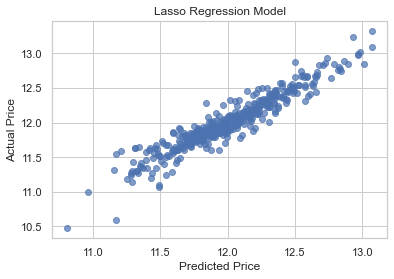

In [432]:
actual_values = y_test
predictions = y_test_pred_lasso
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')
plt.show()

In [433]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)


[(10.458, 'constant'),
 (0.926, 'GrLivArea'),
 (0.561, 'OverallQual'),
 (-0.376, 'YearBuilt_Age'),
 (0.36, 'OverallCond'),
 (0.333, 'MSZoning_RH'),
 (0.319, 'MSZoning_FV'),
 (0.295, 'MSZoning_RL'),
 (0.26, 'GarageCars'),
 (-0.247, 'KitchenAbvGr'),
 (0.239, 'TotalBsmtSF'),
 (0.239, 'MSZoning_RM'),
 (0.225, 'LotArea'),
 (0.177, 'Neighborhood_Crawfor'),
 (-0.175, 'Condition1_PosN'),
 (0.17, '1stFlrSF'),
 (0.164, 'SaleType_New'),
 (0.129, 'ScreenPorch'),
 (0.128, 'BsmtFinSF1'),
 (0.121, 'WoodDeckSF'),
 (0.12, 'GarageType_Attchd'),
 (0.117, 'GarageType_Detchd'),
 (0.115, 'Neighborhood_NridgHt'),
 (0.11, 'SaleCondition_AdjLand'),
 (0.107, 'GarageType_Basment'),
 (-0.105, 'BldgType_Twnhs'),
 (0.103, 'Neighborhood_StoneBr'),
 (-0.102, 'Heating_Others'),
 (0.1, 'GarageType_BuiltIn'),
 (0.091, '2ndFlrSF'),
 (0.091, 'BsmtFullBath'),
 (-0.086, 'Neighborhood_Edwards'),
 (0.083, 'TotRmsAbvGrd'),
 (0.078, 'Fireplaces'),
 (0.078, 'SaleCondition_Normal'),
 (0.069, 'Functional_Typ'),
 (0.065, 'SaleType_

#### Insights:
The Lasso Regression gave us a simpler model with most of the coefficients as zero values and also Lasso Regression has helped us in the feature selection.

In [434]:
# final model parameters
lasso_selected_features

['GrLivArea',
 'OverallQual',
 'YearBuilt_Age',
 'OverallCond',
 'MSZoning_RH',
 'MSZoning_FV',
 'MSZoning_RL',
 'GarageCars',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'MSZoning_RM',
 'LotArea',
 'Neighborhood_Crawfor',
 'Condition1_PosN',
 '1stFlrSF',
 'SaleType_New',
 'ScreenPorch',
 'BsmtFinSF1',
 'WoodDeckSF',
 'GarageType_Attchd',
 'GarageType_Detchd',
 'Neighborhood_NridgHt',
 'SaleCondition_AdjLand',
 'GarageType_Basment',
 'BldgType_Twnhs',
 'Neighborhood_StoneBr',
 'Heating_Others',
 'GarageType_BuiltIn',
 '2ndFlrSF',
 'BsmtFullBath']

### Model Evaluation 
#### ( Plot Actual VS Predicted)

Text(0, 0.5, 'Sales Price')

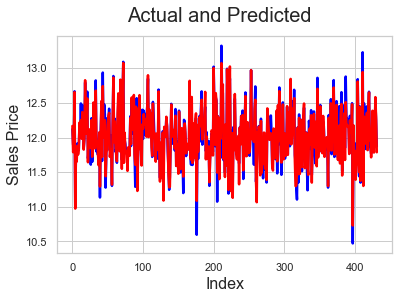

In [435]:
# Linear Regression with RFE: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=16)                                
plt.ylabel('Sales Price', fontsize=16)                          

#### Insights:
- The model seems to be good. The actual and predicted values are significantly overlapped. But it has 50 features, making the model complex.

Text(0, 0.5, 'Sales Price')

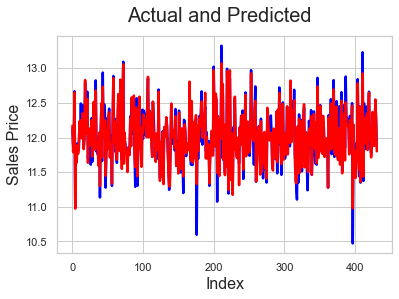

In [436]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)                
plt.xlabel('Index', fontsize=16)                                
plt.ylabel('Sales Price', fontsize=16)                          

#### Insights:
- The Ridge model seems to be almost similar or bit better than the linear model. The actual and predicted values are significantly overlapped. But still does not do the feauture selection,and thus making the model still complex.

Text(0, 0.5, 'Sales Price')

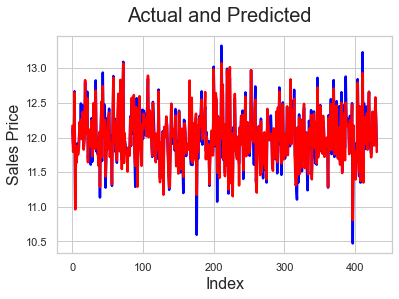

In [437]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=16)                                
plt.ylabel('Sales Price', fontsize=16)                          

#### Insights:
- The Lasso model seems to be good enough to predict. The actual and predicted values are significantly overlapped. And the features has been reduced to 30 features, making the model quite decent.

#### ( Plot Residuals vs. Predicting variables )

Text(0, 0.5, 'residuals_rfe')

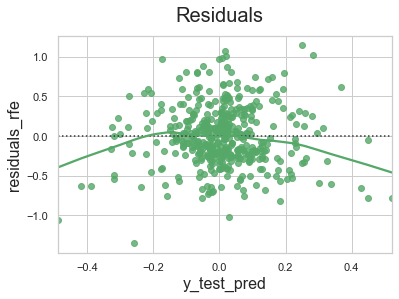

In [438]:
#Linear Regression with RFE: Error Terms
residuals_rfe = y_test-y_test_pred
fig = plt.figure()

sns.set_theme(style="whitegrid")
# Plot the residuals after fitting a linear model
sns.residplot(x=residuals_rfe, y=y_test_pred, lowess=True, color="g")
fig.suptitle('Residuals', fontsize=20)               
plt.xlabel('y_test_pred', fontsize=16)                                
plt.ylabel('residuals_rfe', fontsize=16)  

Text(0, 0.5, 'residuals_ridge')

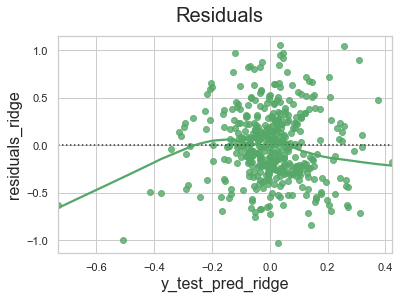

In [439]:
# Ridge Regression with all features: Error Terms
residuals_ridge = y_test-y_test_pred_ridge
fig = plt.figure()
sns.set_theme(style="whitegrid")
# Plot the residuals after fitting a linear model
sns.residplot(x=residuals_ridge, y=y_test_pred_ridge, lowess=True, color="g")
fig.suptitle('Residuals', fontsize=20)               
plt.xlabel('y_test_pred_ridge', fontsize=16)                                
plt.ylabel('residuals_ridge', fontsize=16)     

Text(0, 0.5, 'residuals_lasso')

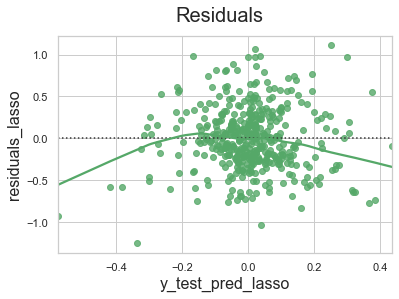

In [440]:
# Lasso Regression with all features: Error Terms
residuals_lasso = y_test-y_test_pred_lasso
fig = plt.figure()
sns.set_theme(style="whitegrid")
# Plot the residuals after fitting a linear model
sns.residplot(x=residuals_lasso, y=y_test_pred_lasso, lowess=True, color="g")
fig.suptitle('Residuals', fontsize=20)               
plt.xlabel('y_test_pred_lasso', fontsize=16)                                
plt.ylabel('residuals_lasso', fontsize=16)   



#### (Plot Error Terms )

Text(0, 0.5, '(y_test) - (y_test_pred)')

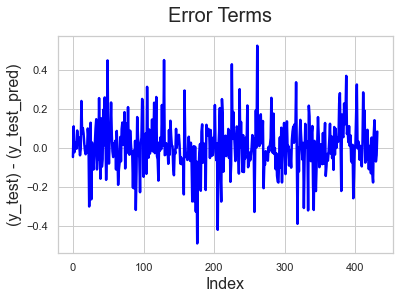

In [441]:
# Linear Regression with RFE: Error Terms
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test- y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=16)                                
plt.ylabel('(y_test) - (y_test_pred)', fontsize=16)                         

Text(0, 0.5, '(y_test) - (y_test_pred_ridge)')

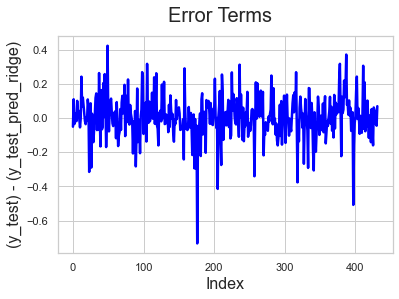

In [442]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test-y_test_pred_ridge, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)                
plt.xlabel('Index', fontsize=16)                               
plt.ylabel('(y_test) - (y_test_pred_ridge)', fontsize=16)                         

Text(0, 0.5, '(y_test) - (y_test_pred_lasso)')

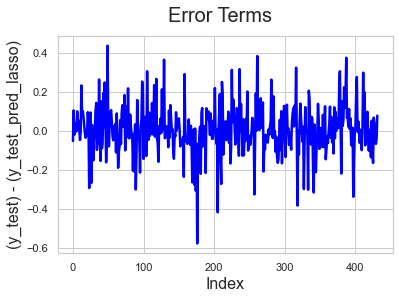

In [443]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test - y_test_pred_lasso, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=16)                                
plt.ylabel('(y_test) - (y_test_pred_lasso)', fontsize=16) 

#### Insights:
- Observing the error terms plot it can be said that the errors are randomly distributed.

### Conclusion of final model

#### Linear Model with Rfe Score
- R2 Train Predicted : 0.9167834086173431
- R2 Test Pred       : 0.893050734432299

#### Ridge Score
- R2 Train Predicted : 0.9126504436007066
- R2 Test Pred Ridge : 0.8976531232252188

#### Lasso Score
- R2 Train Predicted : 0.9157408893574097
- R2 Test Pred lasso : 0.8987489945332023

#### 
- We can see the model accuracy on train and test set for all three models above are similar, we would choose the simpler model.
- Linear Regression model with Rfe is complex, with 50 features.Hence we would not consider that.
- For Ridge regression:
    - Optimum value of alpha(lambda) for Ridge Regression is 2. 
    - Ridge Regression model is fairly complex, even though has a slightly good test score than Linear Regression model with Rfe. But still we would not consider that.
- For Lasso regression:    
    - Optimum value of alpha(lambda) for Lasso Regression is 0.0001.
    - #### Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero. And the features has been reduced to 30.
    - Regularized models perform well on this dataset
    - The most important 30 features that impact the SalePrice are as follows:


In [444]:
# final model parameters
lasso_selected_features

['GrLivArea',
 'OverallQual',
 'YearBuilt_Age',
 'OverallCond',
 'MSZoning_RH',
 'MSZoning_FV',
 'MSZoning_RL',
 'GarageCars',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'MSZoning_RM',
 'LotArea',
 'Neighborhood_Crawfor',
 'Condition1_PosN',
 '1stFlrSF',
 'SaleType_New',
 'ScreenPorch',
 'BsmtFinSF1',
 'WoodDeckSF',
 'GarageType_Attchd',
 'GarageType_Detchd',
 'Neighborhood_NridgHt',
 'SaleCondition_AdjLand',
 'GarageType_Basment',
 'BldgType_Twnhs',
 'Neighborhood_StoneBr',
 'Heating_Others',
 'GarageType_BuiltIn',
 '2ndFlrSF',
 'BsmtFullBath']

### So we choose Lasso model as the final model

#### The five most important predictor variables 

- 'GrLivArea':More the Above grade (ground) living area square feet, more the SalePrice.
- 'OverallQual': Better the overall material and finish of the house,more the SalePrice.
- 'YearBuilt_Age': This is the age of the built,and it has a nevative coefficient. Which means the more the age less the SalePrice and vice versa.
- 'OverallCond': The better the overall condition of the house, more the SalePrice.
- 'MSZoning' (RH, FV and RL): Residential High Density,Floating Village Residential,Residential Low Density,impact the SalePrice.


#### The Next five most important predictor variables 

- 'GarageCars': Better the Size of garage in car capacity, more the SalePrice.
- 'KitchenAbvGr': Kitchen above grade,and it has a nevative coefficient. Which means the more the above grade less the SalePrice and vice versa.
- 'TotalBsmtSF': More the Total square feet of basement area, more the SalePrice.
- 'MSZoning_RM':Residential Medium Density, also next impact the SalePrice.
- 'LotArea': More the Lot size in square feet, more the SalePrice.
- 'Neighborhood_Crawfor': If it is in the Neighborhood of Crawford, then more the SalePrice.



##  ********End Of the Assignment Part One ************************

### For Assignment Part2 Subective,Used the below space for analysis. 

### Note: The actual answer for subjective is in a separate PDF document.

### Assignment Part-II

#### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


#### Answer:
The optimal value of alpha for ridge regression in the given problem is 2.0
If we change the alpha value for ridge to double i.e. 4.0, then we have

The optimal value of alpha for ridge regression in the given problem is 0.0001
If we change the alpha value for lasso to double i.e. 0.0002, then we have


In [445]:
alpha = 4.0
ridge4 = Ridge(alpha=alpha)
ridge4.fit(X_train, y_train)

# predict
y_train_pred = ridge4.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge4.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9085632835605223
0.8951884090474208


In [446]:
# train
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
# test
print(mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso))


0.014529484352281045
0.015604160433028915


In [447]:
# ridge model parameters
model_parameters = list(ridge4.coef_)
model_parameters.insert(0, ridge4.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(10.743, 'constant'),
 (0.511, 'OverallQual'),
 (0.336, 'GrLivArea'),
 (0.324, '1stFlrSF'),
 (-0.322, 'YearBuilt_Age'),
 (0.298, 'OverallCond'),
 (0.283, '2ndFlrSF'),
 (0.283, 'GarageCars'),
 (0.223, 'TotalBsmtSF'),
 (0.192, 'BsmtFinSF1'),
 (0.167, 'Neighborhood_Crawfor'),
 (0.164, 'TotRmsAbvGrd'),
 (0.16, 'LotArea'),
 (-0.156, 'KitchenAbvGr'),
 (0.134, 'WoodDeckSF'),
 (-0.122, 'Condition1_PosN'),
 (0.118, 'ScreenPorch'),
 (0.117, 'Neighborhood_NridgHt'),
 (0.116, 'Fireplaces'),
 (0.113, 'MSZoning_FV'),
 (0.107, 'MSZoning_RL'),
 (0.101, 'Neighborhood_StoneBr'),
 (0.1, 'BsmtFullBath'),
 (-0.1, 'BldgType_Twnhs'),
 (0.099, 'MSZoning_RH'),
 (0.098, 'SaleType_New'),
 (-0.097, 'Heating_Others'),
 (-0.084, 'Neighborhood_Edwards'),
 (0.083, 'Neighborhood_Somerst'),
 (0.08, 'SaleCondition_Normal'),
 (0.076, 'BsmtFinSF2'),
 (0.073, 'BsmtUnfSF'),
 (0.069, 'GarageType_Attchd'),
 (0.062, 'SaleCondition_AdjLand'),
 (0.059, 'Functional_Typ'),
 (0.057, 'MasVnrType_Stone'),
 (0.054, 'GarageType_BuiltI

The optimal value of alpha for lasso regression in the given problem is 0.0001 If we change the alpha value for lasso to double i.e. 0.0002, then we have

In [448]:
alpha = 0.0002
lasso0002 = Lasso(alpha=alpha)
lasso0002.fit(X_train, y_train) 

# predict
y_train_pred = lasso0002.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso0002.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9137615028843609
0.9004367652954188


In [449]:
# lasso model parameters
model_parameters = list(lasso0002.coef_)
model_parameters.insert(0, lasso0002.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(10.627, 'constant'),
 (0.972, 'GrLivArea'),
 (0.583, 'OverallQual'),
 (-0.376, 'YearBuilt_Age'),
 (0.361, 'OverallCond'),
 (0.253, 'GarageCars'),
 (0.243, 'TotalBsmtSF'),
 (0.229, 'MSZoning_FV'),
 (-0.227, 'KitchenAbvGr'),
 (0.224, 'MSZoning_RH'),
 (0.208, 'MSZoning_RL'),
 (0.203, 'LotArea'),
 (0.173, 'Neighborhood_Crawfor'),
 (-0.162, 'Condition1_PosN'),
 (0.148, 'MSZoning_RM'),
 (0.126, 'BsmtFinSF1'),
 (0.124, '1stFlrSF'),
 (0.123, 'ScreenPorch'),
 (0.121, 'WoodDeckSF'),
 (0.116, 'SaleType_New'),
 (0.111, 'Neighborhood_NridgHt'),
 (-0.102, 'BldgType_Twnhs'),
 (0.095, 'Neighborhood_StoneBr'),
 (0.094, 'BsmtFullBath'),
 (-0.09, 'Heating_Others'),
 (0.082, 'Fireplaces'),
 (0.081, 'TotRmsAbvGrd'),
 (-0.08, 'Neighborhood_Edwards'),
 (0.079, 'SaleCondition_Normal'),
 (0.071, 'SaleCondition_AdjLand'),
 (0.068, 'GarageType_Attchd'),
 (0.067, '2ndFlrSF'),
 (0.065, 'GarageType_Detchd'),
 (0.064, 'Functional_Typ'),
 (0.06, 'Neighborhood_Somerst'),
 (-0.055, 'Exterior1st_CemntBd'),
 (0.052, 'S

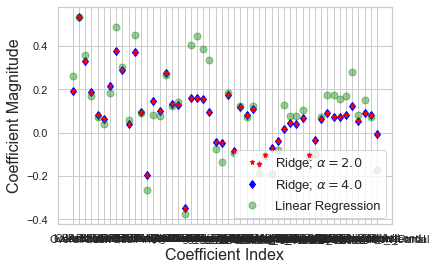

In [450]:
plt.plot(ridge.coef_,alpha=2.0,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 2.0$',zorder=7)

plt.plot(ridge.coef_,alpha=4.0,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 4.0$') 

coeff = pd.DataFrame(lm.params, index = X_train.columns, columns = ['Coefficient'])
plt.plot(coeff,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

training score for alpha=0.0001: 0.9157408893574097
test score for alpha =0.0001:  0.8987489945332023
training score for alpha=0.0002: 0.9137615028843609
test score for alpha =0.0002:  0.9004367652954188


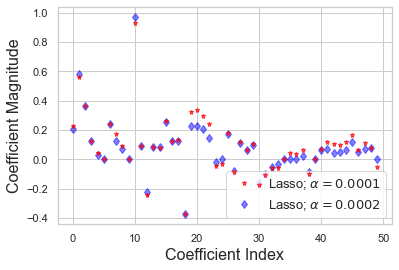

In [451]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
lasso001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.0001:", train_score001)
print ("test score for alpha =0.0001: ", test_score001)

lasso00002 = Lasso(alpha=0.0002, max_iter=10e5)
lasso00002.fit(X_train,y_train)
train_score00002=lasso00002.score(X_train,y_train)
test_score00002=lasso00002.score(X_test,y_test)
coeff_used00002 = np.sum(lasso00002.coef_!=0)
print ("training score for alpha=0.0002:", train_score00002)
print ("test score for alpha =0.0002: ", test_score00002)



plt.plot(lasso001.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.0001$',zorder=7) # alpha here is for transparency
plt.plot(lasso00002.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.0002$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

#### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer:


##### Lets drop the five most important predictor variables
-  'GrLivArea',
-  'OverallQual',
-  'YearBuilt_Age',
-  'OverallCond',
-  'MSZoning

In [452]:
X_train.shape

(1007, 50)

In [453]:
X_test.shape

(432, 50)

In [454]:
# Drop the 5 features
X_train_New = X_train.drop(['GrLivArea','OverallQual', 'YearBuilt_Age', 'OverallCond','MSZoning_RH',
 'MSZoning_FV','MSZoning_RL','MSZoning_RM'], axis=1)

In [455]:
X_test_New = X_test.drop(['GrLivArea','OverallQual', 'YearBuilt_Age', 'OverallCond','MSZoning_RH',
 'MSZoning_FV','MSZoning_RL','MSZoning_RM'], axis=1)

In [456]:
X_train_New.shape

(1007, 42)

In [457]:
X_test_New.shape

(432, 42)

In [458]:
# Now lets try our model with the optimal value of alpha using GridSearchCV
folds  = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_param, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_New, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [459]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020510,0.009769,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.847685,0.877933,0.660027,0.859694,0.866342,0.822336,0.081744,1,0.863817,0.856817,0.889509,0.861297,0.858367,0.865961,0.012018
1,0.007292,0.009082,0.000000,0.000000,0.0010,{'alpha': 0.001},0.851565,0.876169,0.667917,0.852509,0.852332,0.820098,0.076659,2,0.852060,0.845465,0.877956,0.850513,0.847078,0.854614,0.011905
2,0.004800,0.003919,0.012801,0.009601,0.0100,{'alpha': 0.01},0.720674,0.720367,0.645941,0.702336,0.693918,0.696647,0.027389,3,0.723345,0.701525,0.753991,0.703943,0.710587,0.718678,0.019212
3,0.006374,0.007809,0.001609,0.003217,0.0500,{'alpha': 0.05},0.110674,0.102498,0.114003,0.098781,0.084631,0.102117,0.010310,4,0.107231,0.111601,0.123513,0.120266,0.117348,0.115992,0.005877
4,0.006251,0.007655,0.003125,0.006250,0.1000,{'alpha': 0.1},-0.025120,-0.007330,-0.029428,-0.003477,-0.019234,-0.016918,0.010017,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


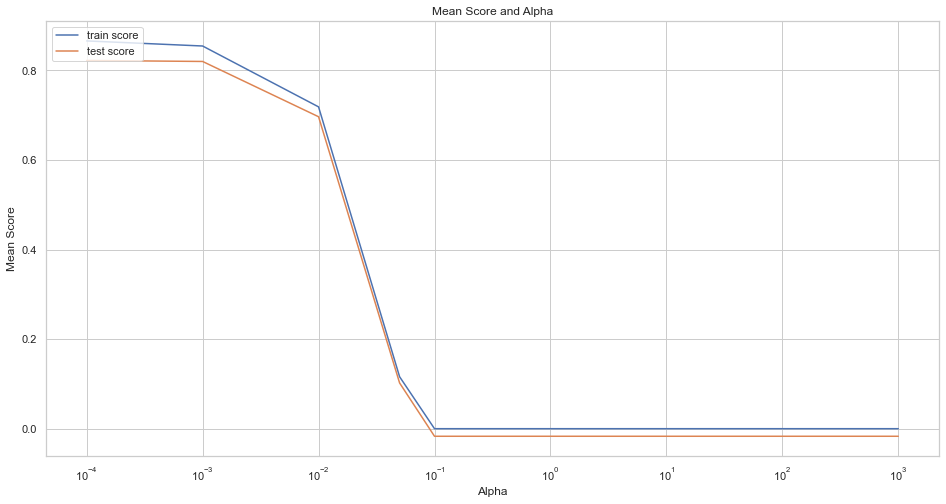

In [460]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('Mean Score')
plt.xlabel('Alpha')
plt.title("Mean Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [461]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [462]:
alpha = 0.0001
lasso0001 = Lasso(alpha=alpha)
lasso0001.fit(X_train_New, y_train) 

# predict
y_train_pred = lasso0001.predict(X_train_New)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso0001.predict(X_test_New)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.8634670864696916
0.8208508011051949


In [463]:
#mean_squared_error

# train
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
# test
print(mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso))


0.021695363831475856
0.027609334130709828


In [464]:
# lasso model parameters
model_parameters = list(lasso0001.coef_)
model_parameters.insert(0, lasso0001.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_New.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(10.796, 'constant'),
 (0.89, '1stFlrSF'),
 (0.595, '2ndFlrSF'),
 (-0.555, 'KitchenAbvGr'),
 (0.51, 'GarageCars'),
 (0.389, 'TotalBsmtSF'),
 (-0.237, 'Condition1_PosN'),
 (0.232, 'GarageType_BuiltIn'),
 (0.229, 'GarageType_Attchd'),
 (0.208, 'Neighborhood_Crawfor'),
 (0.193, 'SaleCondition_AdjLand'),
 (-0.189, 'Heating_Others'),
 (0.185, 'Neighborhood_StoneBr'),
 (0.182, 'WoodDeckSF'),
 (0.175, 'Neighborhood_Somerst'),
 (0.171, 'SaleType_New'),
 (0.167, 'Neighborhood_NridgHt'),
 (-0.162, 'Exterior1st_CemntBd'),
 (-0.159, 'Electrical_Mix'),
 (0.159, 'GarageType_Basment'),
 (0.146, 'GarageType_Detchd'),
 (0.143, 'MasVnrType_Stone'),
 (0.139, 'ScreenPorch'),
 (0.139, 'Functional_Typ'),
 (0.13, 'LotArea'),
 (0.12, 'BsmtFullBath'),
 (0.115, 'MasVnrType_BrkFace'),
 (0.113, 'BsmtFinSF1'),
 (0.113, 'SaleCondition_Normal'),
 (-0.105, 'Neighborhood_Edwards'),
 (0.098, 'TotRmsAbvGrd'),
 (0.088, 'MasVnrType_None'),
 (0.078, 'Exterior2nd_CmentBd'),
 (0.07, 'Fireplaces'),
 (-0.067, 'BldgType_Twnhs'

After dropping the five most important predictor variables ('GrLivArea','OverallQual','YearBuilt_Age','OverallCond','MSZoning’) from the final model from Lasso Regression, we create another model. Below are the five most important predictor variables now.

Features	Coefficient
- 1stFlrSF	0.89
- 2ndFlrSF	0.595
- KitchenAbvGr	-0.555
- GarageCars	0.51
- TotalBsmtSF	0.389

 Features	Inferences
- 1stFlrSF	More the  First Floor square feet, more the SalePrice
- 2ndFlrSF	More the Second floor square feet, more the SalePrice
- KitchenAbvGr	 Kitchen above grade,and it has a nevative coefficient. Which means the more the above grade less the - SalePrice and vice versa.
- GarageCars	Better the Size of garage in car capacity, more the SalePrice.
- TotalBsmtSF	More the Total square feet of basement area, more the SalePrice
